# Цель проекта

- Требуется подготовить исследование объявлений о продаже квартир в Санкт-Петербурге.
- Наша цель исследованить следующие показатели:
-- Изучить параметры объектов недвижимости.
-- Изучить сроки продажи квартир.
-- Определить главные факторы, влияющие на стоимость недвижимости.
-- Определить среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
-- Выделить квартиры в Санкт-Петербурге и вычислите среднюю цену каждого километра до центра города.

# Структура проекта

1. [Чтение файла и просмотр общей информации](#p1)
    * [Загрузка библиотек](#p1-1)
    * [Чтение файла](#p1-2)
    * [Изучение общей информации](#p1-3)
    * [Построение общей гистограммы для всех числовых столбцов таблицы](#p1-4)
2. [Предобработка данных](#p2)
    * [Заполнение пропусков в столбце "высота потолка" на медиану](#p2-1)
    * [Удаление строк с пропусками в столбце "Всего этажей"](#p2-2)
    * [Замена на 0 пропусков в столбце "балкон"](#p2-3)
    * [Замена пропусков в столбце "площадь кухни"](#p2-4)
    * [Замена пропусков в столбце жилой площади](#p2-5)
    * [Привожу столбцы к нужному типу данных](#p2-6)
    * [Проверка на наличие дубликатов](#p2-7)
    * [В столбце Локаций замена всех букв "ё" на "е"](#p2-8)
    * [В столбце Локаций убрал из назвваний "городского типа" и "городской"](#p2-9)
    * [Устранение редких и выбивающихся значений](#p2-10)
    * [Проверка столбца "потолки"](#p2-11)
    * [Проверка столбца "кол-во комнат"](#p2-12)
    * [Проверка столбца "общая площадь"](#p2-13)
    * [Проверка столбца "всего этажей"](#p2-14)
3. [Добавление в таблицу новых столбцов](#p3)
    * [Добавление столбеца с ценой квадратного метра](#p3-1)
    * [Добавление столбеца с годом, месяцем и днем публикации объявления](#p3-2)
    * [Добавление столбца с типом этажа квартиры (первый, последний или другой)](#p3-3)
    * [Добавление столбца с расстоянием до центра города в километрах](#p3-4)
4. [Исследовательский анализ данных](#p4)
    * [Изучение общей площади квартир](#p4-1)
    * [Изучение жилой площади квартир](#p4-2)
    * [Изучение общей площади кухонных помещений](#p4-3)
    * [Изучение цены объектов недвижимости](#p4-4)
    * [Изучение количества комнат](#p4-5)
    * [Изучение высоты потолков](#p4-6)
    * [Изучение этажа квартир](#p4-7)
    * [Изучение типа этажности](#p4-8)
    * [Изучение общего количества этажей в доме](#p4-9)
    * [Изучение расстояния до центра города](#p4-10)
    * [Изучение расстояния до близжайшего аэропорта](#p4-11)
    * [Изучение расстояния до близжайшего парка](#p4-12)
    * [Изучение дня и месяца публикации объявления](#p4-13)
    * [Изучение времени продажи квартиры](#p4-14)
    * [Исключаем нули и находим время продажи квартиры в среднем и по медиане](#p4-15)
5. [Изучение факторов, влияющих на стоимость квартиры и нахождение коэффициента корреляции Пирсона](#p5)
    * [Изучение влияния общей площади квартиры](#p5-1)
    * [Изучение влияния жилой площади квартиры](#p5-2)
    * [Изучение влияния площади кухни](#p5-3)
    * [Изучение влияния количества комнат в квартире](#p5-4)
    * [Изучение влияния типа этажа в квартире](#p5-5)
    * [Изучение влияния даты публикации объявления](#p5-6)
    * [Выделение 10 населенных пунктов с самым большим количеством объявлений](#p5-7)
    * [Считаем среднюю стоимость квадратного метра для этих городов](#p5-8)
    * [Рассчет cредней цены каждого киллометра до центра Санкт-Петербурга](#p5-9)
6. [Общий вывод](#p6)

## Чтение файла и просмотр общей информации

### Загрузка библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Чтение файла

In [2]:
data = pd.read_csv("/datasets/real_estate_data.csv" , sep = "\t")

### Изучим общую информацию

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

- В таблице 23 699 срок и 22 столбца.
- Во многих слобцах достаточно много пропусков.
- В некоторых слобцах неверный формат float64.

### Построим общую гистограмму для всех числовых столбцов таблицы

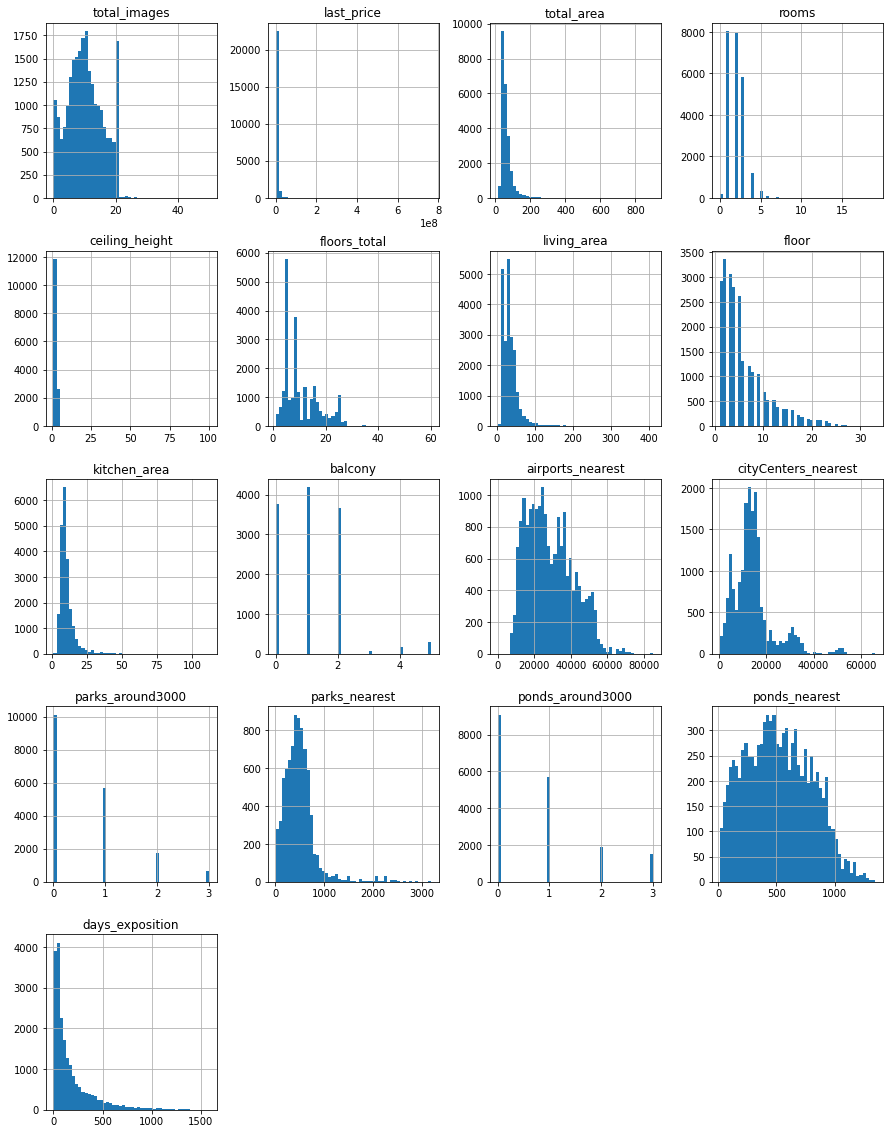

In [4]:
data.hist(figsize=(15,20) , bins = 50)
plt.show()

## Предобработка данных

### Заполним пропуски в столбце "высота потолка" на медиану

In [5]:
data['ceiling_height'] = data['ceiling_height'].fillna(data["ceiling_height"].median())

### Удалим строки с пропусками в столбце "Всего этажей"

In [6]:
data = data.dropna(subset = ["floors_total"])

### Заменим на 0 пропуски в столбце балконов

In [7]:
data['balcony'] = data['balcony'].fillna("0")

- Так как пропусков в столбце "Всего этажей" не много, данные строки можно удалить.
- Пропуски в столбце "Балкон" означают, что балкона нет, поэтому можно заменить пропуски на "0".
- Заполнение пропусков для расстояния до парков, аэропортов и центра повлияют на графики, лучше оставить пропуск. 
- Пропуски в днях продажах, скорее всего, означают, что квартира до сих пор в продаже.

### Заменим пропуски в столбце площадь кухни

In [8]:
data["kitchen_area"] = data["kitchen_area"].fillna(data["total_area"]*(data["kitchen_area"].median()/data["total_area"].median()))

Иногда продавцы могут не указывать площадь помещения, однако, мы можем попробовать его вычислить. Найдем соотношение медианной общей площади к медианной жилой. Далее заполним пропуски в столбце отношением общей площади к найденному соотношению.

### Заменим пропуски в столбце жилой площади

In [9]:
data["living_area"] = data["living_area"].fillna(data["total_area"]*(data["total_area"].median()/data["living_area"].median()))

### Привожу столбцы к нужному типу данных

In [10]:
data["floors_total"] = data["floors_total"].astype(int)
data["balcony"] = data["balcony"].astype(int)
data["kitchen_area"] = data['kitchen_area'].astype('float32')
data["living_area"] = data['living_area'].astype('float32')

- В Столбцах "Количество этажей" и "Балкон" заменил тип на целочисленный.
- Для экономии памяти, заменил формат float64 на float32 в столбцах площадей помещений.

### Проверка на наличие дубликатов

In [11]:
print('Сумма найденных дубликатов:', data.duplicated().sum())       

Сумма найденных дубликатов: 0


### В столбце Локаций заменим все буквы "ё" на "е"

In [12]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

### В столбце Локаций уберем из назвваний "городского типа" и "городской"

In [13]:
data['locality_name'] = data['locality_name'].str.replace(' городского типа ', '')
data['locality_name'] = data['locality_name'].str.replace(' городской ', '')

### Устраняем редкие и выбивающиеся значения

#### Проверям столбец "потолки"

AxesSubplot(0.125,0.125;0.775x0.755)


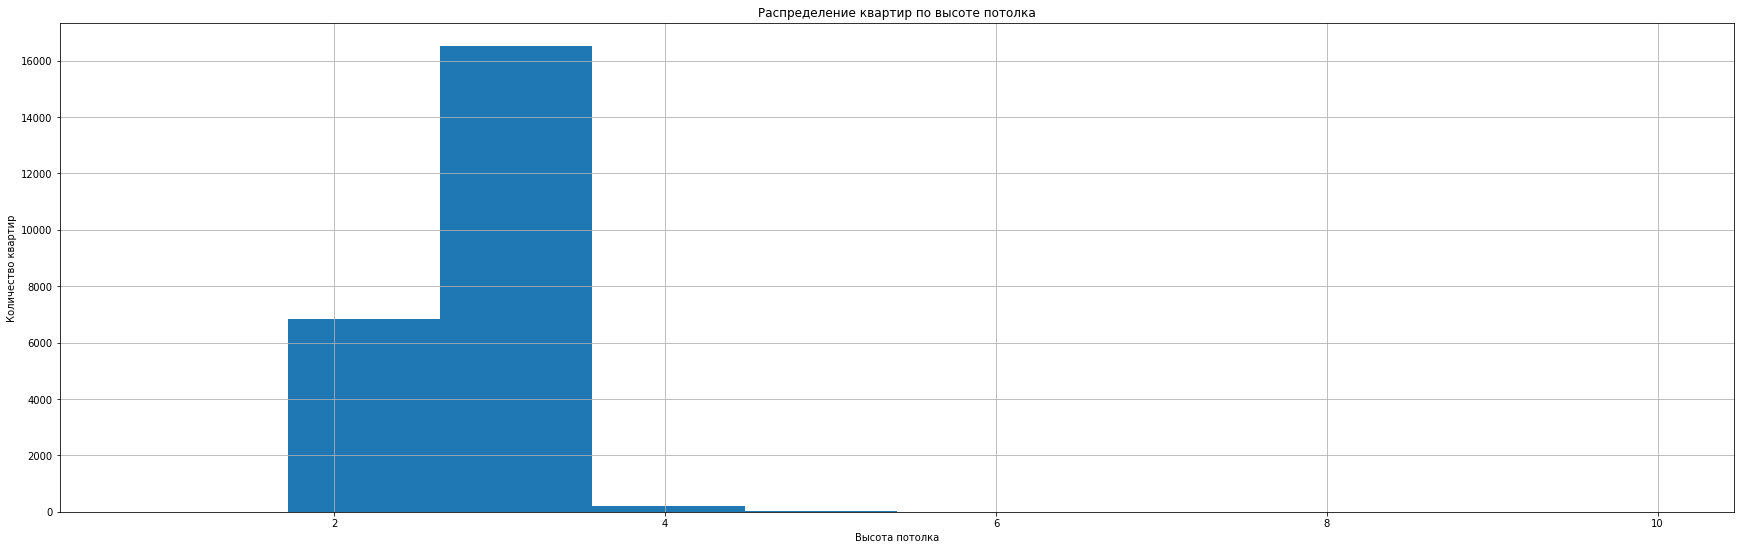

In [14]:
data["ceiling_height"] = data["ceiling_height"].where(data["ceiling_height"] < 8, data["ceiling_height"]/10)
print(data["ceiling_height"].hist(figsize = (30,9)))
plt.title('Распределение квартир по высоте потолка')
plt.xlabel("Высота потолка")
plt.ylabel("Количество квартир")
plt.show()

#### Проверям столбец "кол-во комнат"

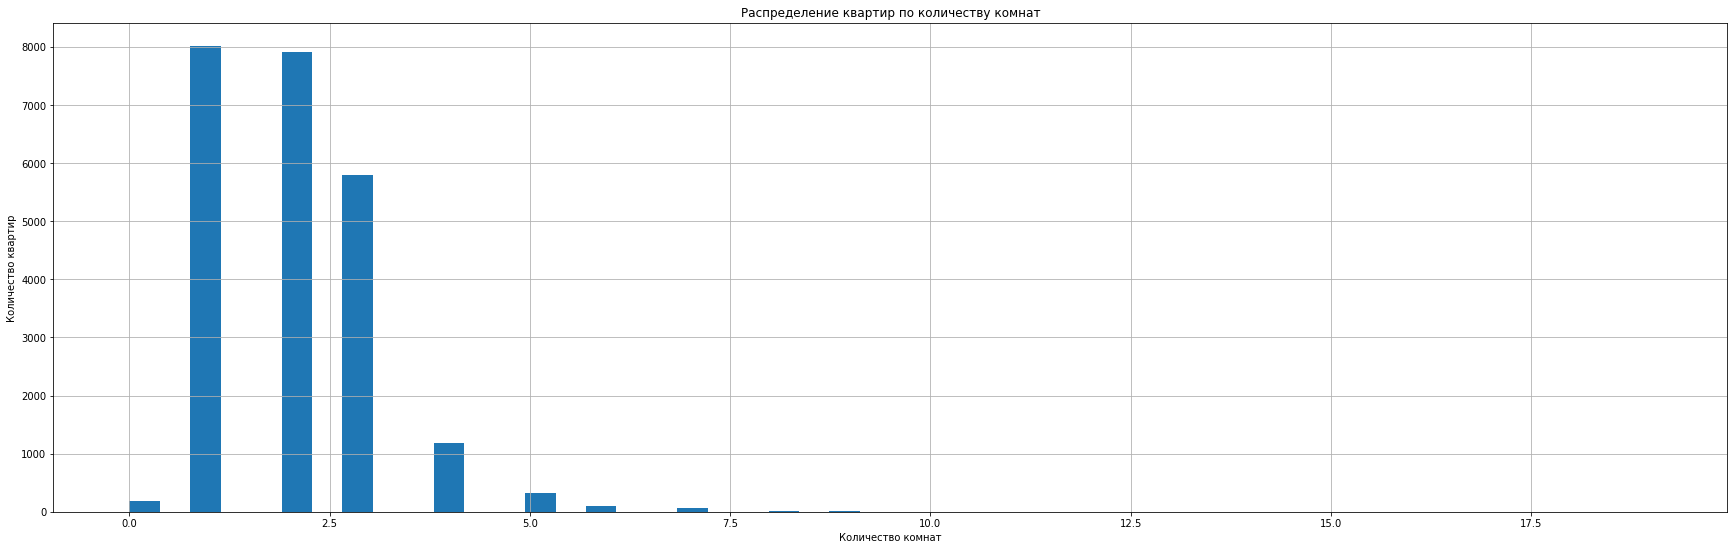

In [15]:
data["rooms"].hist(bins = 50, figsize = (30,9))
plt.title('Распределение квартир по количеству комнат')
plt.xlabel("Количество комнат")
plt.ylabel("Количество квартир")
plt.show()

Будем считать аномальными значениями кол-во больше 10 комнат

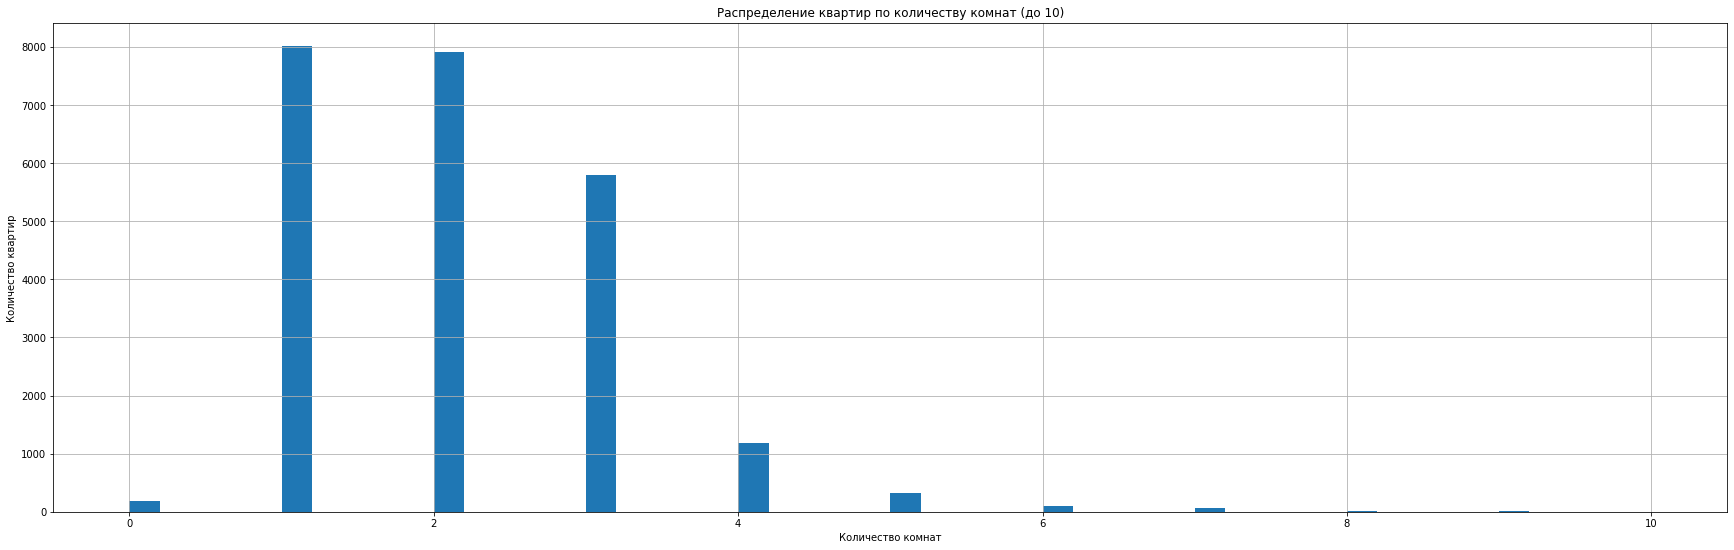

In [16]:
data = data.query("rooms <= 10")
data["rooms"].hist(bins=50, figsize = (30,9))
plt.title('Распределение квартир по количеству комнат (до 10)')
plt.xlabel("Количество комнат")
plt.ylabel("Количество квартир")
plt.show()

#### Проверям столбец "общая площадь"

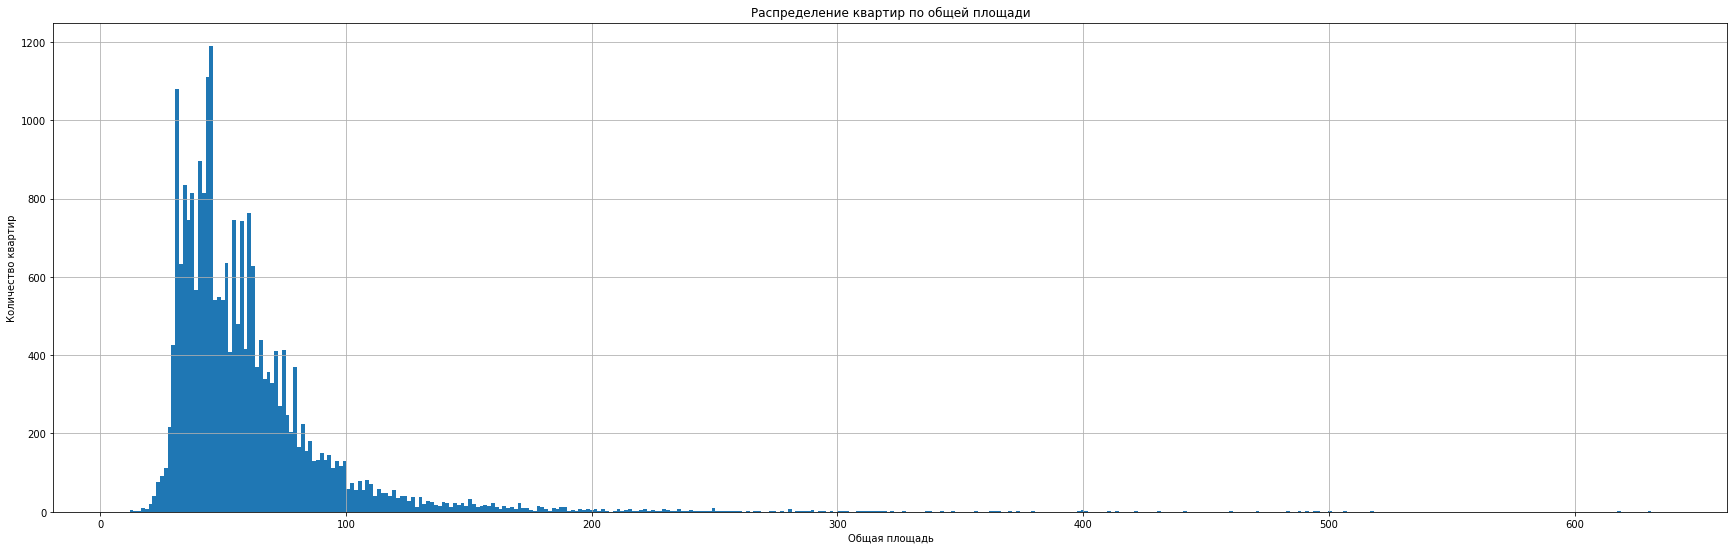

In [17]:
data["total_area"].hist(figsize = (30,9) , bins = 400)
plt.title('Распределение квартир по общей площади')
plt.xlabel("Общая площадь")
plt.ylabel("Количество квартир")
plt.show()

- Основное кол-во квартир площадью менее 100 метров.
- Исходя из гистограммы, можно считать выбросами квартиры более 200 метров.

In [18]:
data = data.query("total_area <= 200")

#### Проверям столбец "всего этажей"

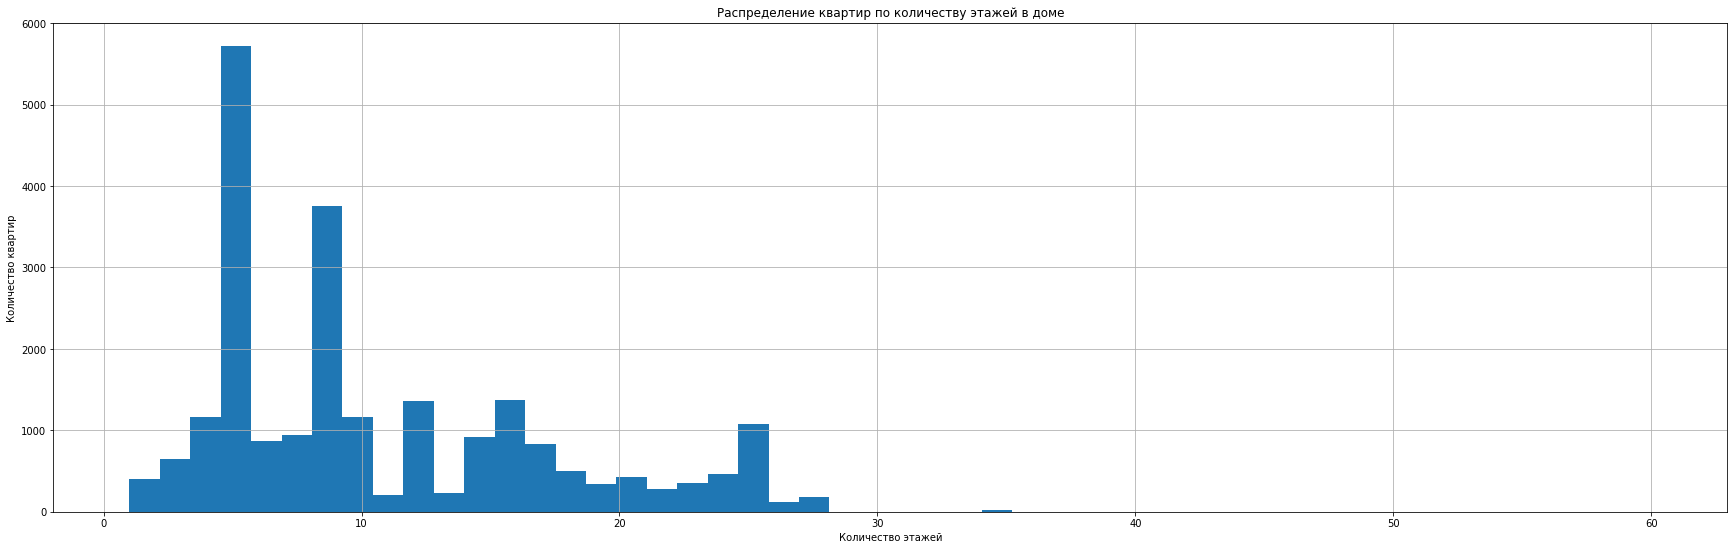

In [19]:
data["floors_total"].hist(bins = 50, figsize = (30,9))
plt.title('Распределение квартир по количеству этажей в доме')
plt.xlabel("Количество этажей")
plt.ylabel("Количество квартир")
plt.show()

Исходя из гистограммы, за выбросы можно считать значения больше 30 этажей. Их слишком мало, чтобы повлиять на результат.

In [20]:
data = data.query("floors_total < 30")

## Добавление в таблицу новые столбцов

### Добавим столбец с ценой квадратного метра

In [21]:
data["cost_metr"] = data["last_price"]/data["total_area"]

### Добавим столбецы с годом, месяцем и днем публикации объявления

In [22]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S") 
data["month"] = data["first_day_exposition"].dt.month
data["week"] = data["first_day_exposition"].dt.week
data["year"] = data["first_day_exposition"].dt.year

/tmp/ipykernel_399/2165148357.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data["week"] = data["first_day_exposition"].dt.week


### Добавим столбецы с типом этажа квартиры (первый, последний или другой)

In [23]:
def func(df):
    if df["floor"] == 1:
        return "первый"
    if df["floor"] == df["floors_total"]:
        return "последний"
    return "другой"
data["floor_category"] = data.apply(func, axis = 1)

### Добавим столбецы с расстоянием до центра города в километрах

In [24]:
data["centr"] = data["ceiling_height"].where(data["cityCenters_nearest"] == "NaN", data["cityCenters_nearest"]/1000)
data["centr"] = data["centr"].round()

## Исследовательский анализ данных

### Изучим общую площадь квартир

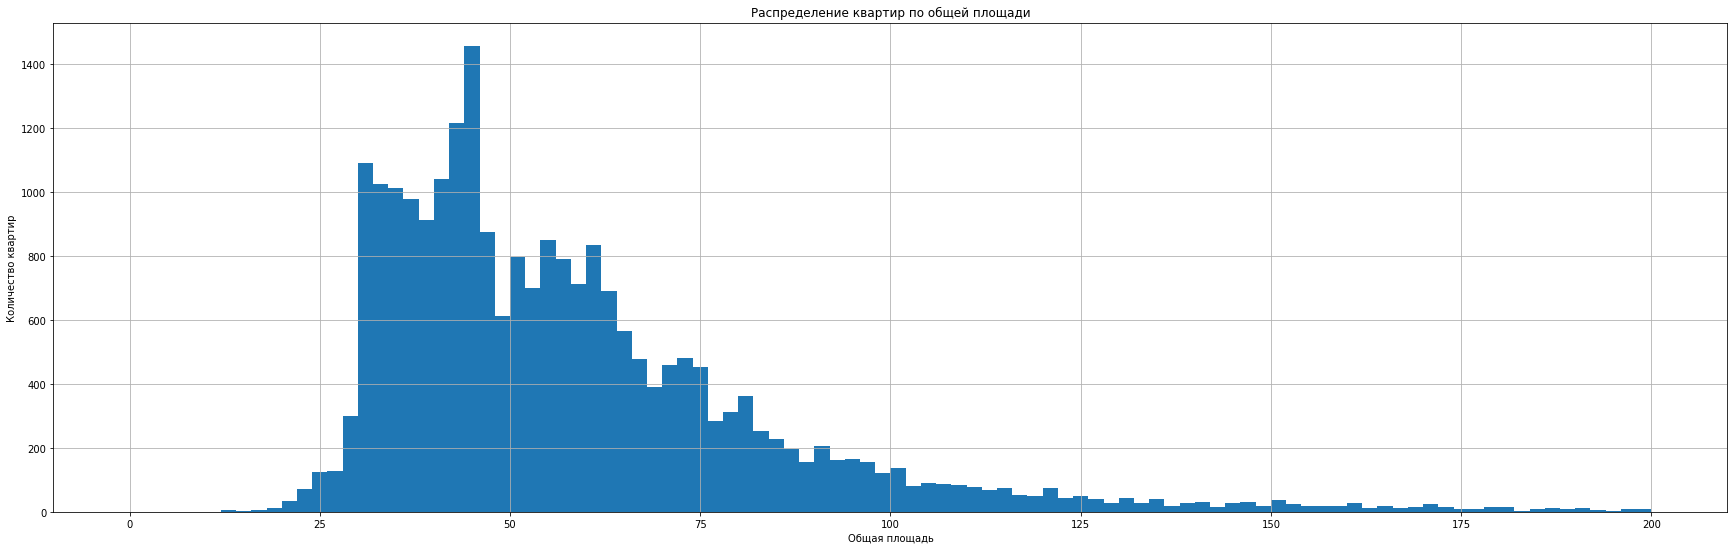

In [25]:
data["total_area"].hist(figsize = (30,9), bins = 100, grid = True, range = (0,200))
plt.title('Распределение квартир по общей площади')
plt.xlabel("Общая площадь")
plt.ylabel("Количество квартир")
plt.show()

- На гистограмме видно, что пик квартир приходится на площадь от 30 до 65 метров. 
- Больше всего квартир с площадью около 35-40 квадратных метров. 
- Распределение данных похоже на нормальное.

### Изучим жилую площадь квартир

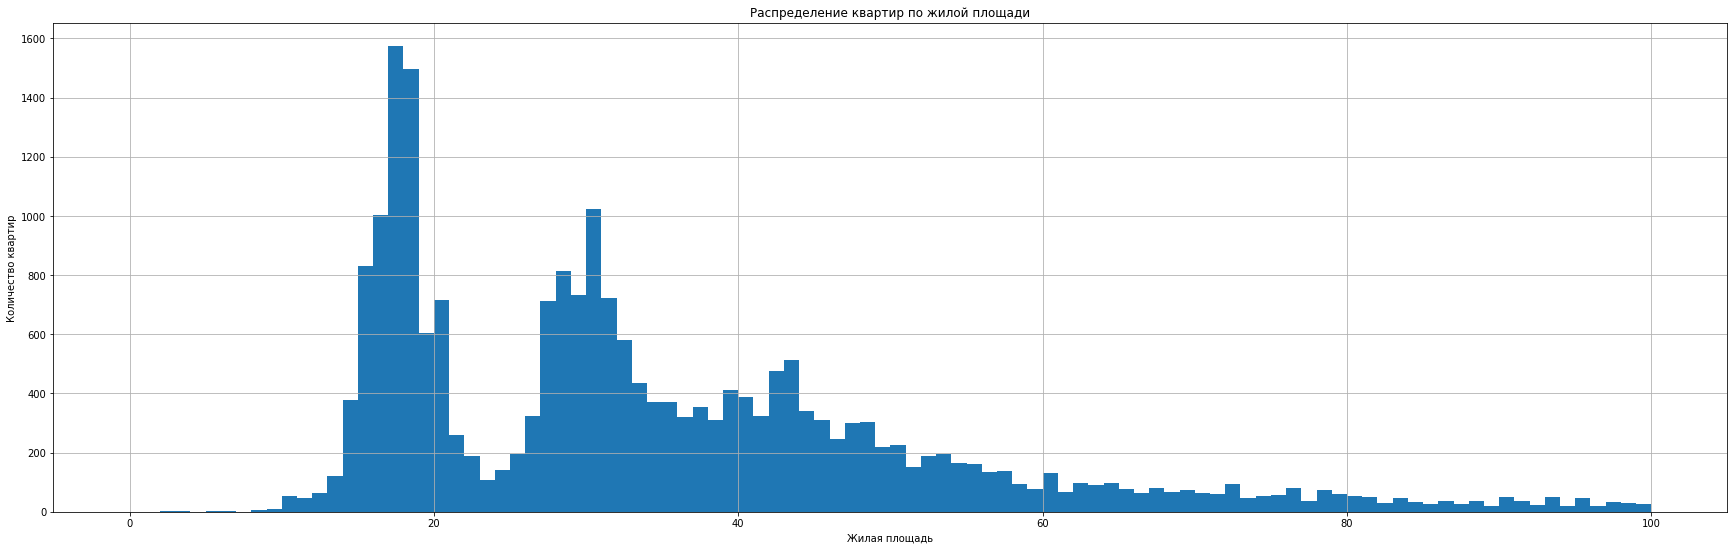

In [26]:
data["living_area"].hist(figsize = (30,9), bins = 100, grid = True, range = (0,100))
plt.title('Распределение квартир по жилой площади')
plt.xlabel("Жилая площадь")
plt.ylabel("Количество квартир")
plt.show()

- Пик жилой площажи приходится на 15-18 квадратных метров, это соотносится с данными из прошлой гистограммы. 
- Меньший пик приходится на 30 квадратных метров.

### Изучим общую площадь кухонных помещений

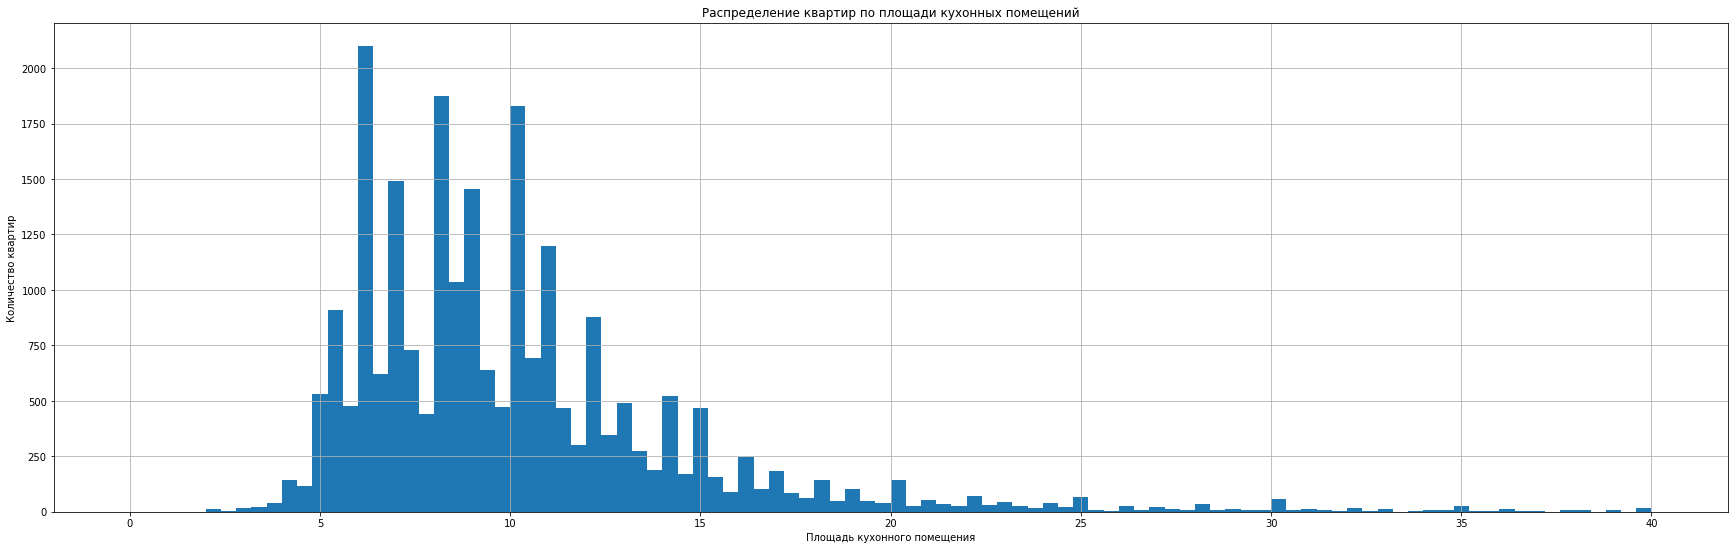

In [27]:
data["kitchen_area"].hist(figsize = (30,9), bins = 100, grid = True, range = (0,40))
plt.title('Распределение квартир по площади кухонных помещений')
plt.xlabel("Площадь кухонного помещения")
plt.ylabel("Количество квартир")
plt.show()

- Данные кажутся правдоподобными, пик приходится на кухни от 6 до 11 квадратных метров. 
- Просадки в графике объясняются типовым жильем: в основном, для определенных квадратур квартир площади кухни совпадают. 
- Распределение также нормальное.

### Изучим цены объектов недвижимости

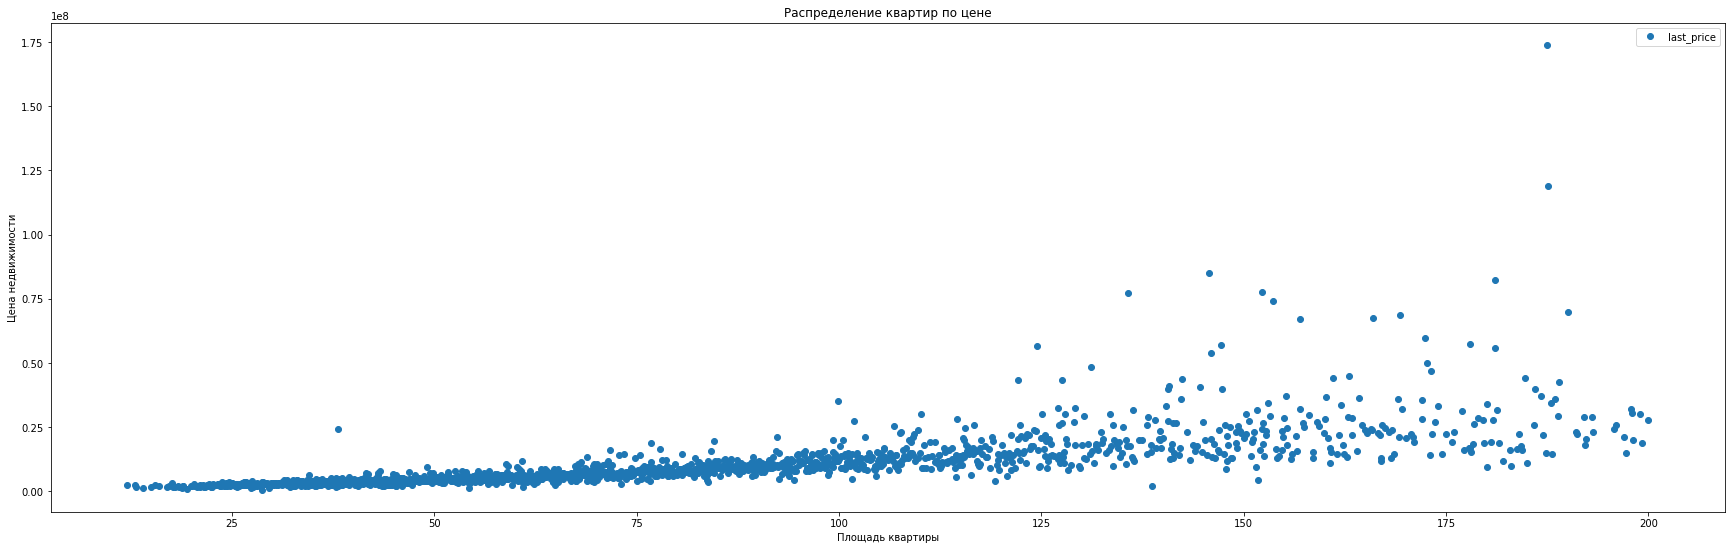

In [28]:
data.pivot_table(index = "total_area" , values = "last_price").plot(y="last_price" , style = "o", figsize = (30,9))
plt.title('Распределение квартир по цене')
plt.xlabel("Площадь квартиры")
plt.ylabel("Цена недвижимости")
plt.show()

- Попробовал посмотреть на цену, сгруппированную по площади. 
- На графике видно, что чем больше площадь, тем выше цена. 
- Также на графике мы видим исключения, на которые влияют другие параметры, кроме площади (скорее всего, это близость к центру или ремонт). 

### Изучим количество комнат

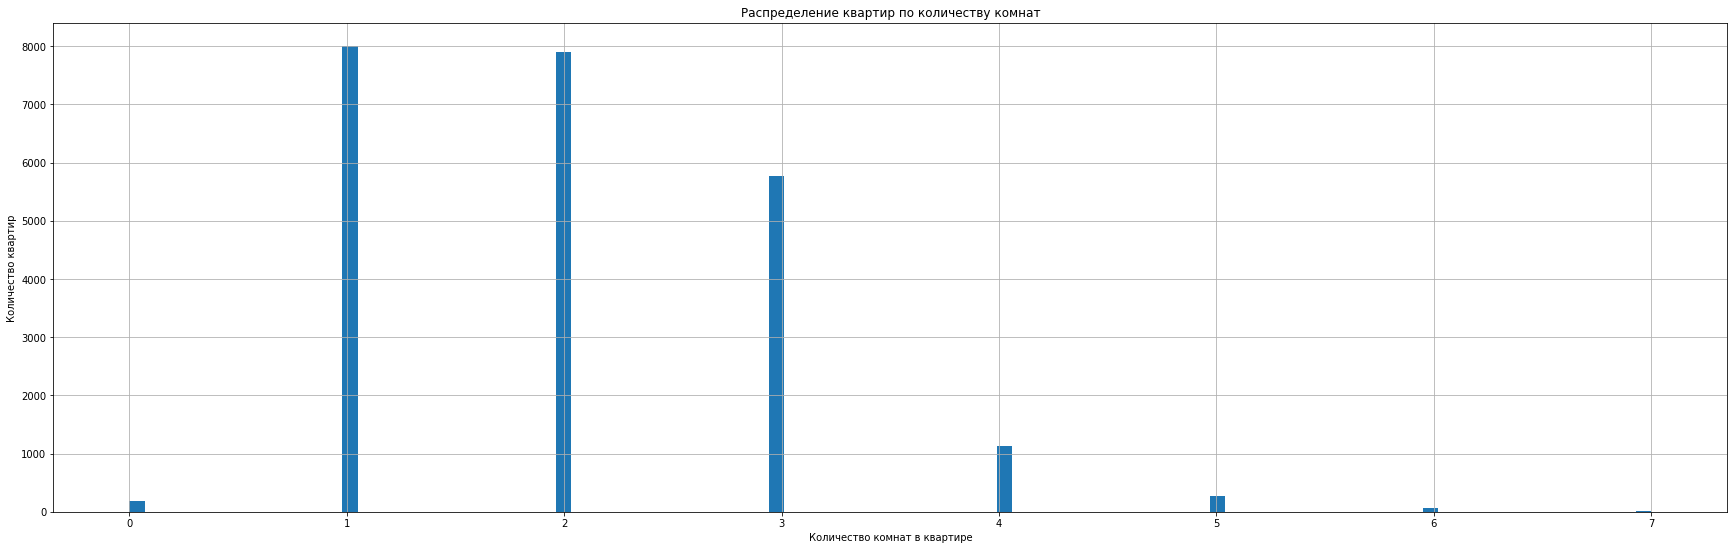

In [29]:
data["rooms"].hist(figsize = (30,9), bins = 100, grid = True, range = (0,7))
plt.title('Распределение квартир по количеству комнат')
plt.xlabel("Количество комнат в квартире")
plt.ylabel("Количество квартир")
plt.show()

- Из гитограммы делаем вывод, что большинство квартир - однокомнатные, чуть меньше двухкомнатных, и еще меньше трехкомнатных квартир. 
- Процент квартир с четырьмя и более комнатами достаточно мал. 
- Квартиры с нулем комнат выбросами не считаю: скорее всего, это студии.

### Изучим высоту потолков

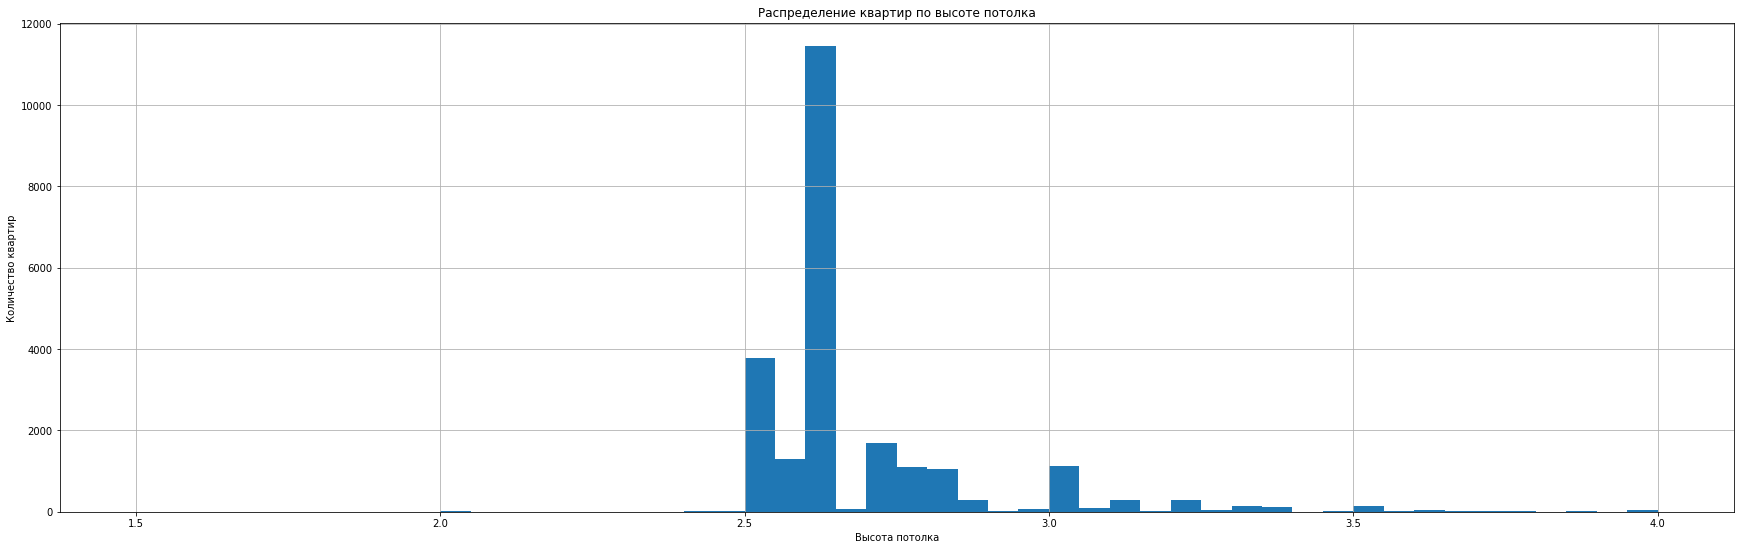

In [30]:
data["ceiling_height"].hist(figsize = (30,9), bins = 50, grid = True, range = (1.5,4))
plt.title('Распределение квартир по высоте потолка')
plt.xlabel("Высота потолка")
plt.ylabel("Количество квартир")
plt.show()

- В основном во всех квартирах высота потолков от 2.5 до 3.2 метров. 
- Квартир с полтолками выше 3.2 метра достаточно мало.

### Изучим этажи квартир

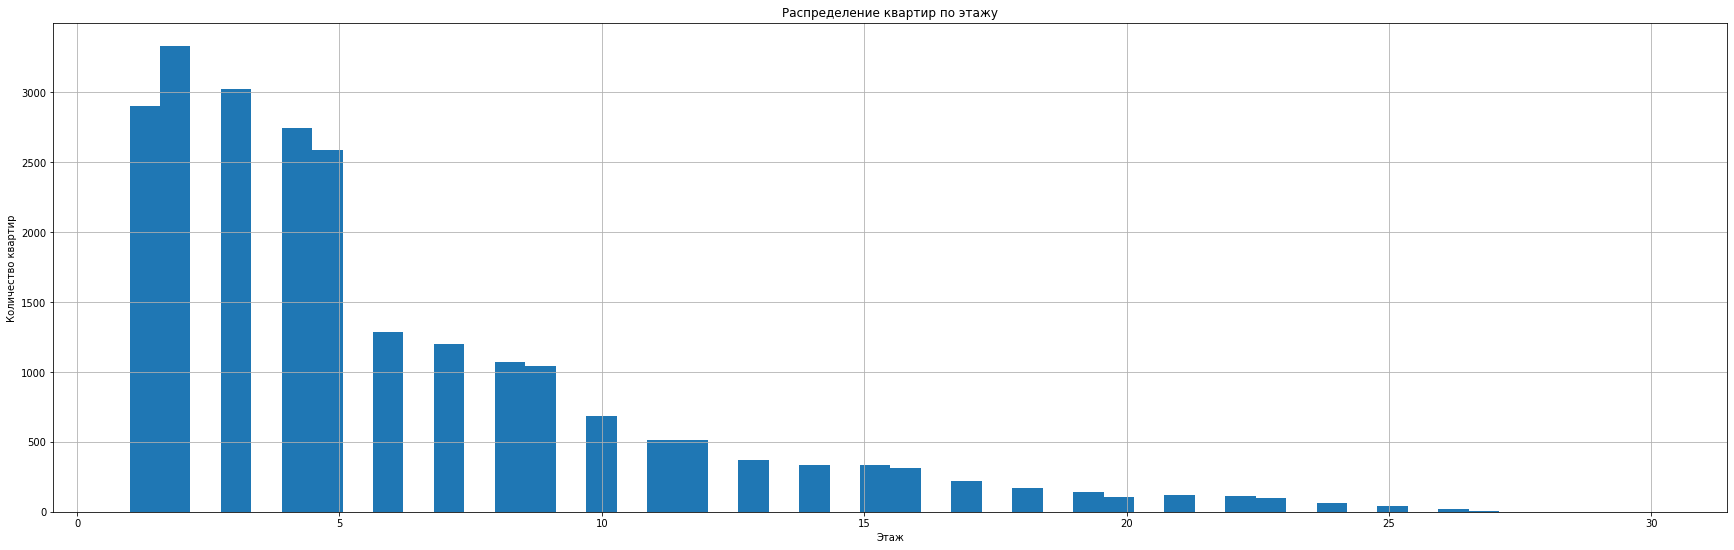

In [31]:
data["floor"].hist(figsize = (30,9), bins = 50, grid = True, range = (1,30))
plt.title('Распределение квартир по этажу')
plt.xlabel("Этаж")
plt.ylabel("Количество квартир")
plt.show()

- Делаем вывод, что основное кол-во объявлений - это квартиры, расположенные от 1 до 5 этажа, это может быть связано с преобладанием пятиэтажек. 
- Квартиры выше 25 этажа считаются крайне редкими.

### Изучим тип этажности

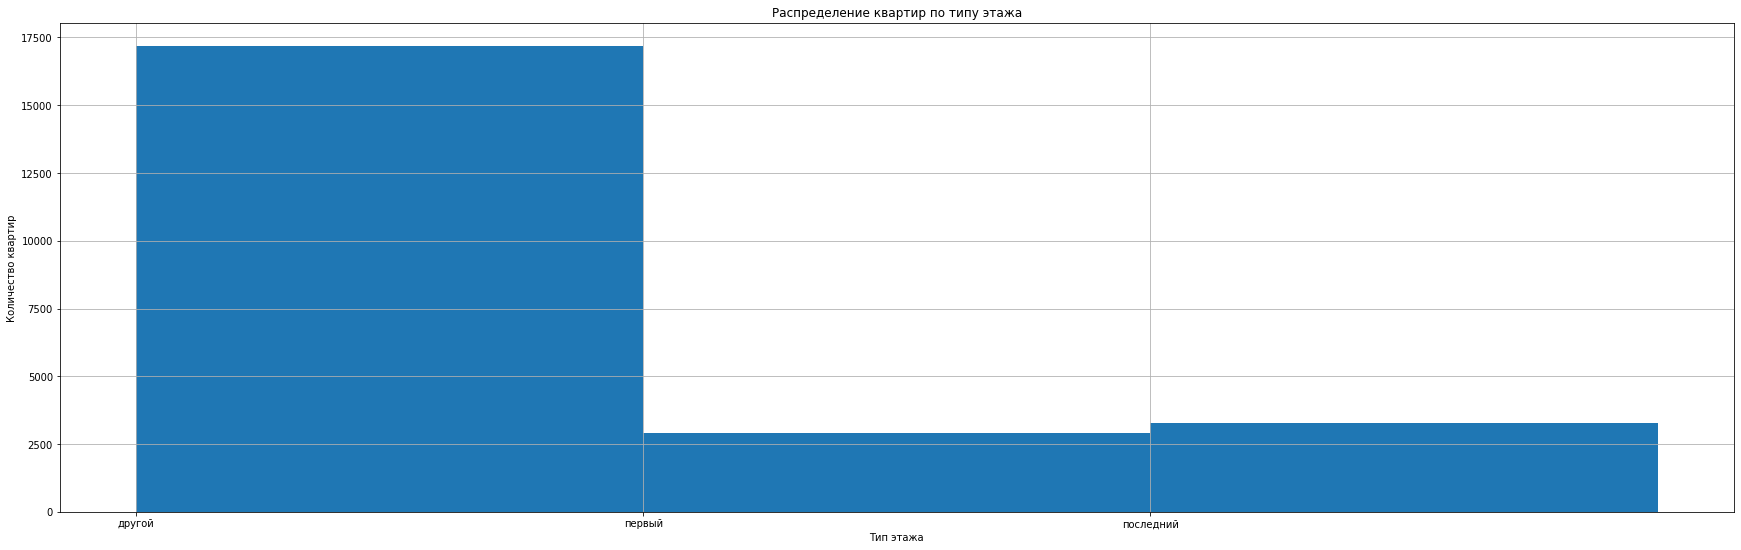

In [32]:
data["floor_category"].hist(figsize = (30,9), bins = 3, grid = True, range = (0,3))
plt.title('Распределение квартир по типу этажа')
plt.xlabel("Тип этажа")
plt.ylabel("Количество квартир")
plt.show()

- В нашем исследовании преобладают квартиры с типом "Другие" - не первый и не последний этаж. 
- Видно, что на последнем этаже квартир чуть больше, чем на первом. 

### Изучим общее количество этажей в доме

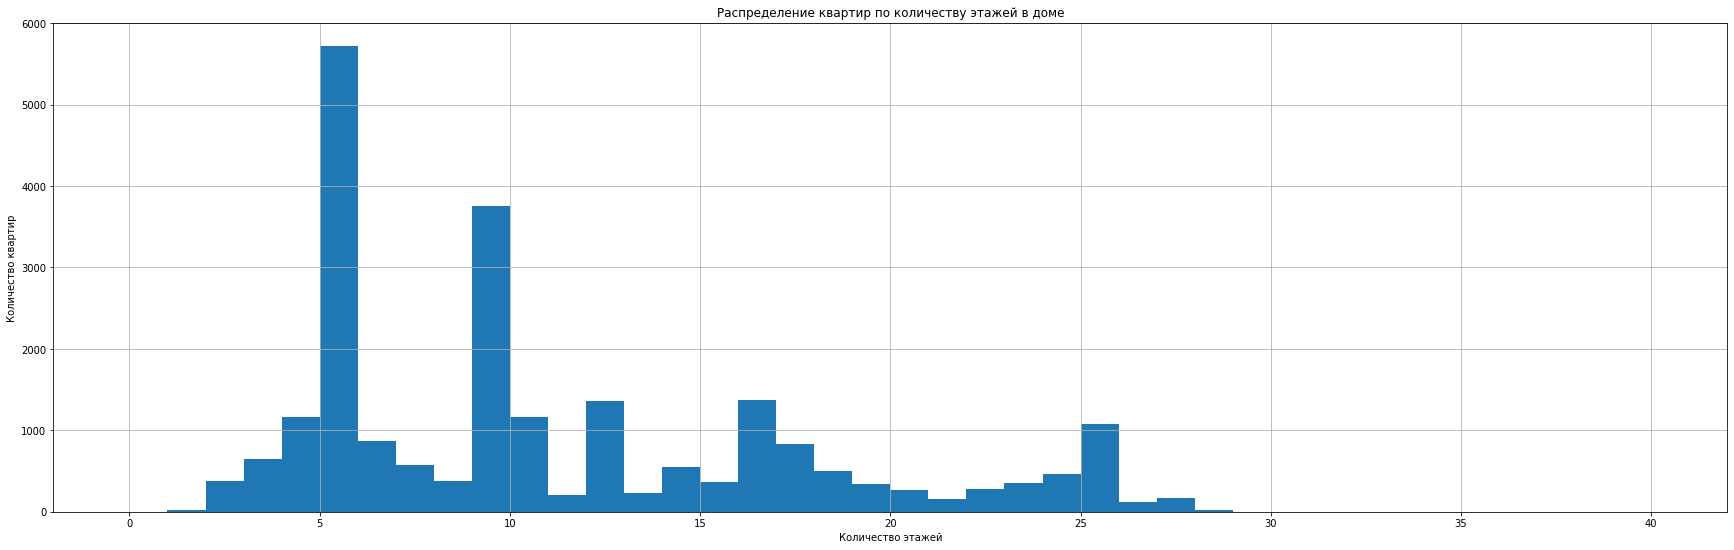

In [33]:
data["floors_total"].hist(figsize = (30,9), bins = 40, grid = True, range = (0,40))
plt.title('Распределение квартир по количеству этажей в доме')
plt.xlabel("Количество этажей")
plt.ylabel("Количество квартир")
plt.show()

Подтверждаем вывод из прошлых гистограмм - большинство домов пятиэтажки. Также большое количество домов с 9 этажами.

### Изучим расстояние до центра города

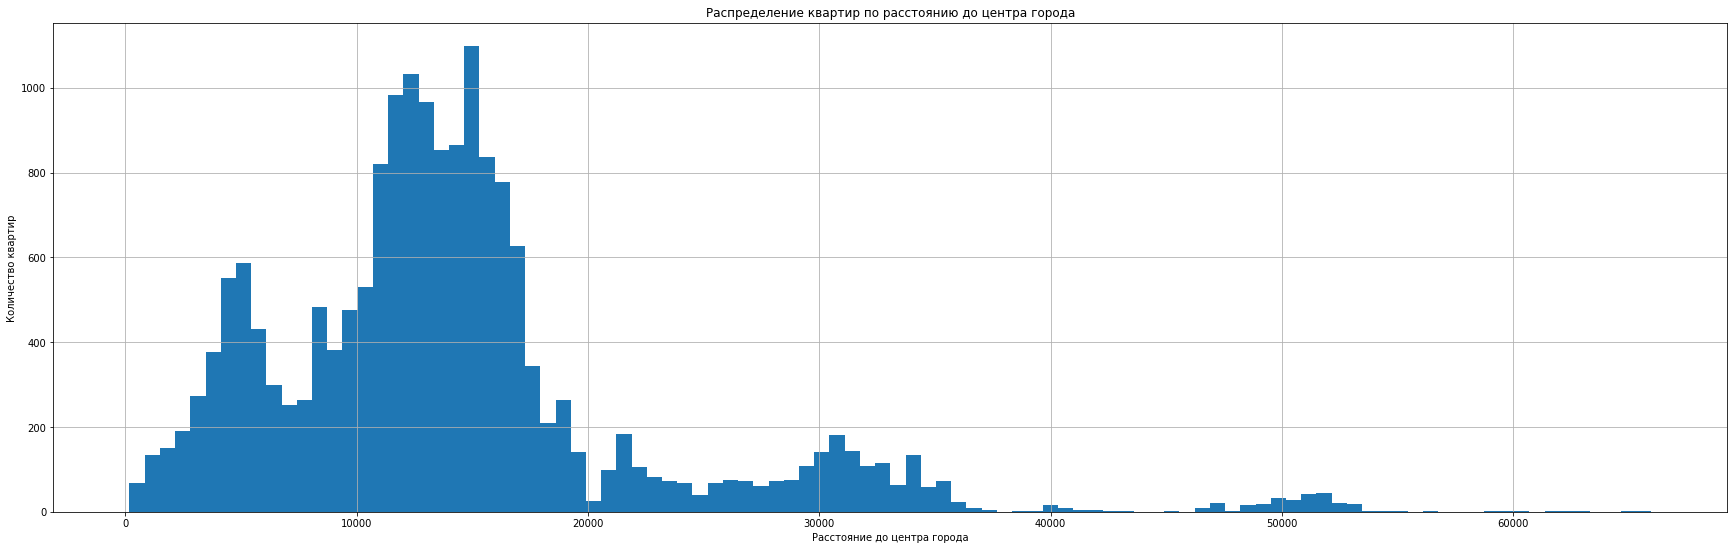

In [34]:
data["cityCenters_nearest"].hist(figsize = (30,9), bins = 100, grid = True)
plt.title('Распределение квартир по расстоянию до центра города')
plt.xlabel("Расстояние до центра города")
plt.ylabel("Количество квартир")
plt.show()

- Типичное расстояние до центра города - от 10 до 15 км. 
- Также достаточно много квартир до 10 км. 
- Между 35 и 45 километрами жилой застройки нет. 
- На расстоянии в 50 км, очевидно, был построен новый район. 
- Данные с дальностью больше 35 км считаются редкими. 

### Изучим расстояние до близжайшего аэропорта

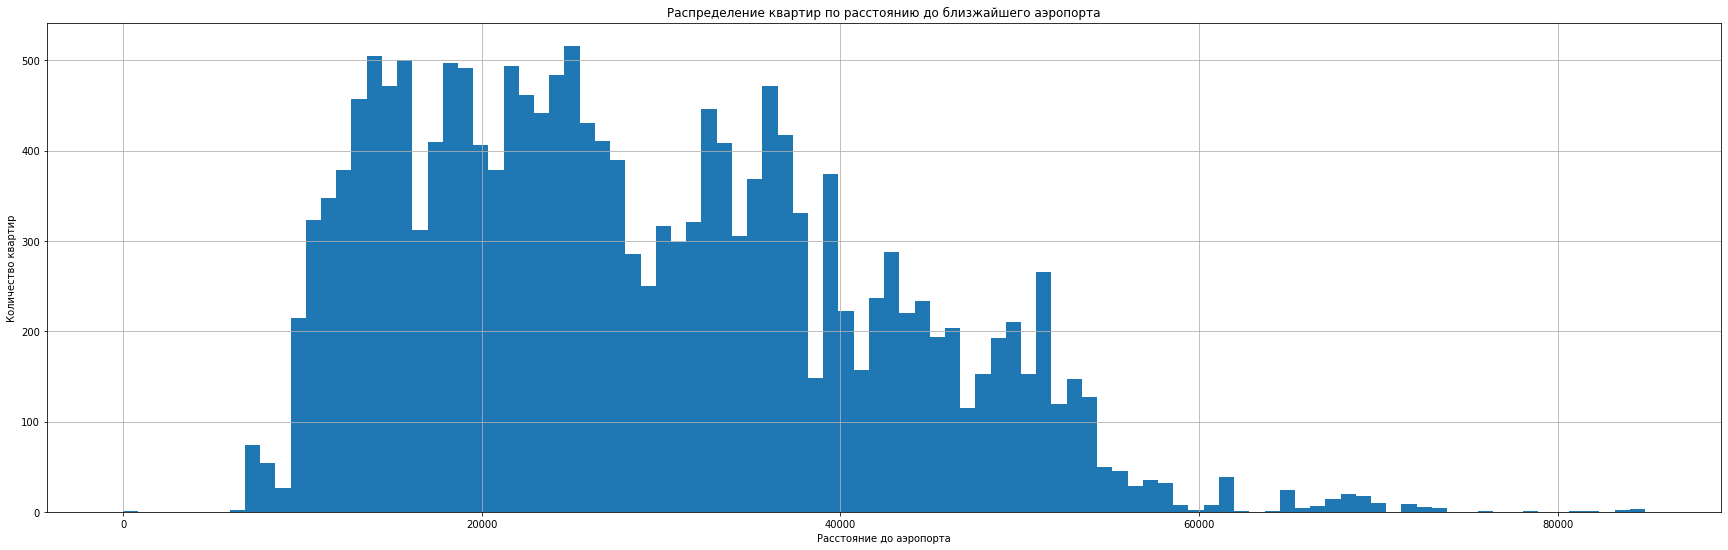

In [35]:
data["airports_nearest"].hist(figsize = (30,9), bins = 100, grid = True)
plt.title('Распределение квартир по расстоянию до близжайшего аэропорта')
plt.xlabel("Расстояние до аэропорта")
plt.ylabel("Количество квартир")
plt.show()

- В основном расстояние до аэропорта - от 10 до 40 км. 
- Явный пик отсутствует. 
- Расстояние больше 60 км считается крайне редким.

### Изучим расстояние до близжайшего парка

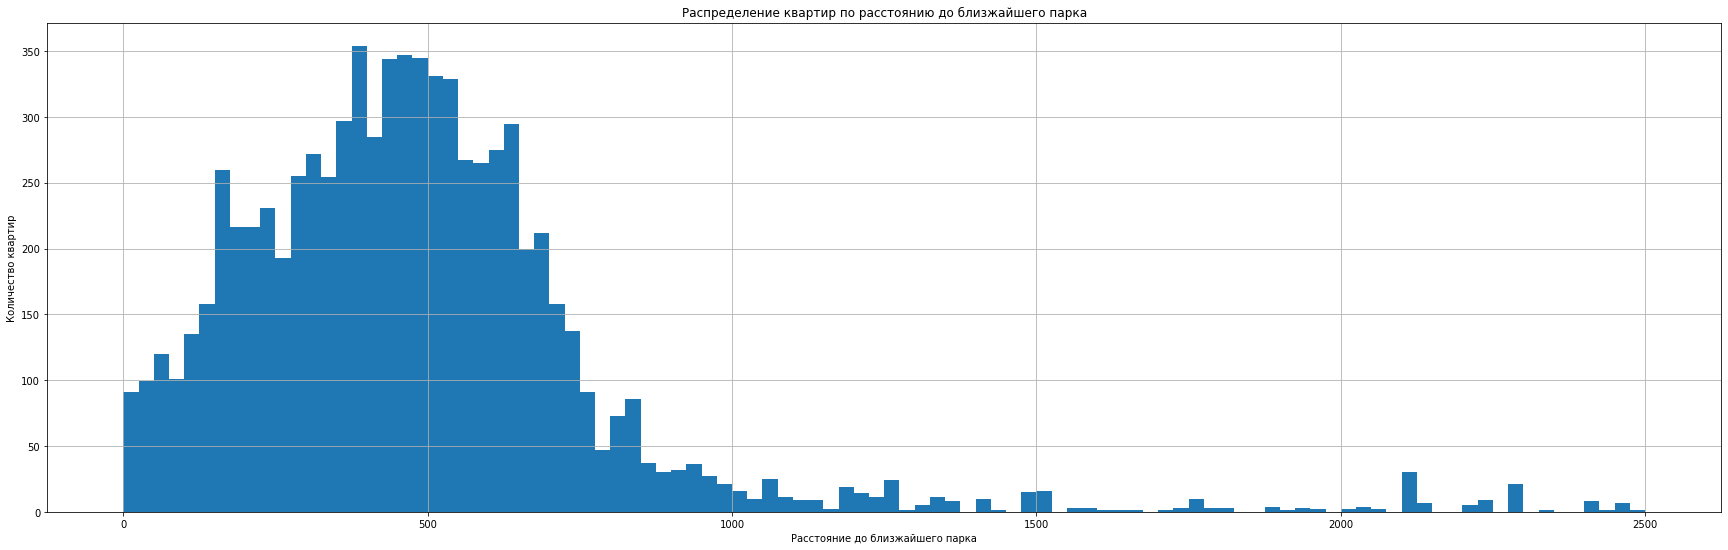

In [36]:
#Расстояние до ближайшего парка
data["parks_nearest"].hist(figsize = (30,9), bins = 100, grid = True, range = (0,2500))
plt.title('Распределение квартир по расстоянию до близжайшего парка')
plt.xlabel("Расстояние до близжайшего парка")
plt.ylabel("Количество квартир")
plt.show()

- У большинства квартир расстояние до ближайшего парка 500 метров, в основном это расстояние от 0 до 1 км. 
- Квартиры с расстоянием в 0 метров до парка возможно:
-- Расположены в парковых зонах 
-- В непосредственной близости к парку (дом расположен вплотную)
-- выброс

### Изучим день и месяц публикации объявления

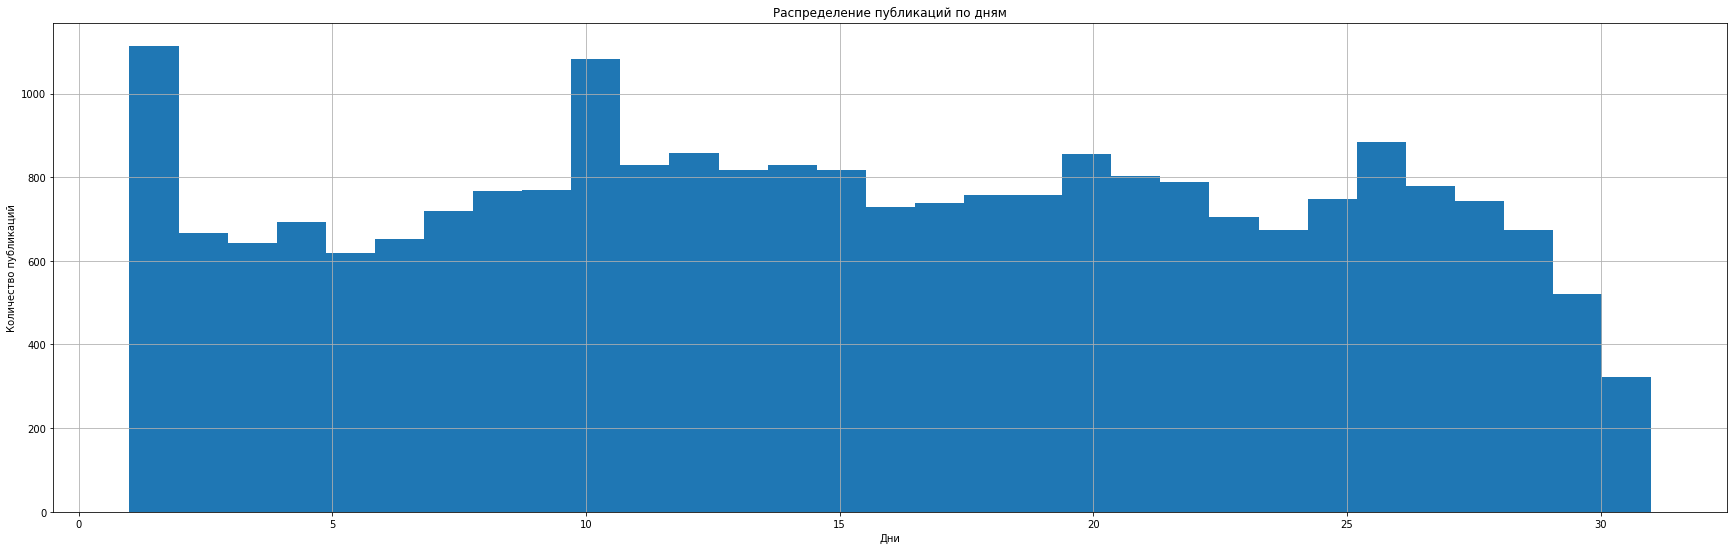

In [37]:
data["first_day_exposition"].dt.day.hist(bins = 31, figsize = (30,9))
plt.title('Распределение публикаций по дням')
plt.xlabel("Дни")
plt.ylabel("Количество публикаций")
plt.show()

- В днях публикаций объявлений видно два пика - 1 и 10 число, остальные дни распределились равномерно. 
- Спад на 31 день объясняется тем, что не в каждом месяце есть 31 число.

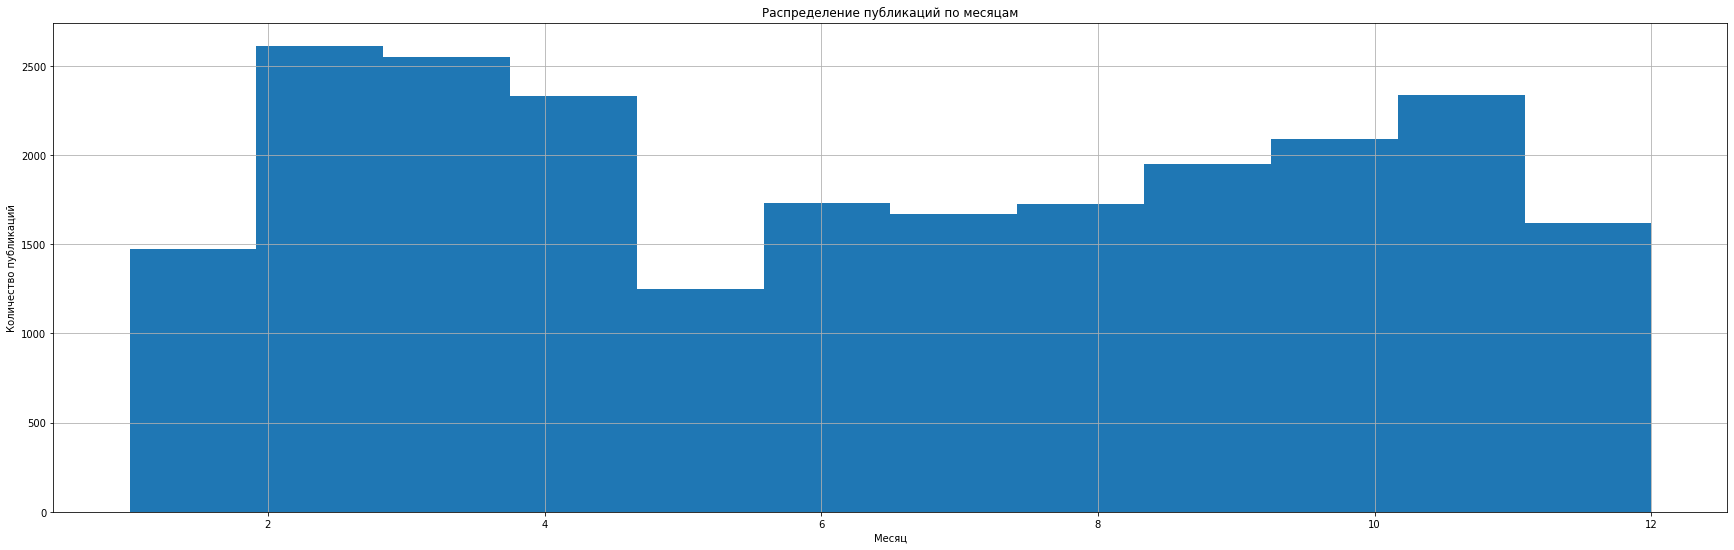

In [38]:
data["month"].hist(bins = 12, figsize = (30,9))
plt.title('Распределение публикаций по месяцам')
plt.xlabel("Месяц")
plt.ylabel("Количество публикаций")
plt.show()

- Пик объявлений приходится на февраль, март, апрель и ноябрь. 
- Меньше всего объявлений публикуется в мае.

### Изучим время продажи квартиры

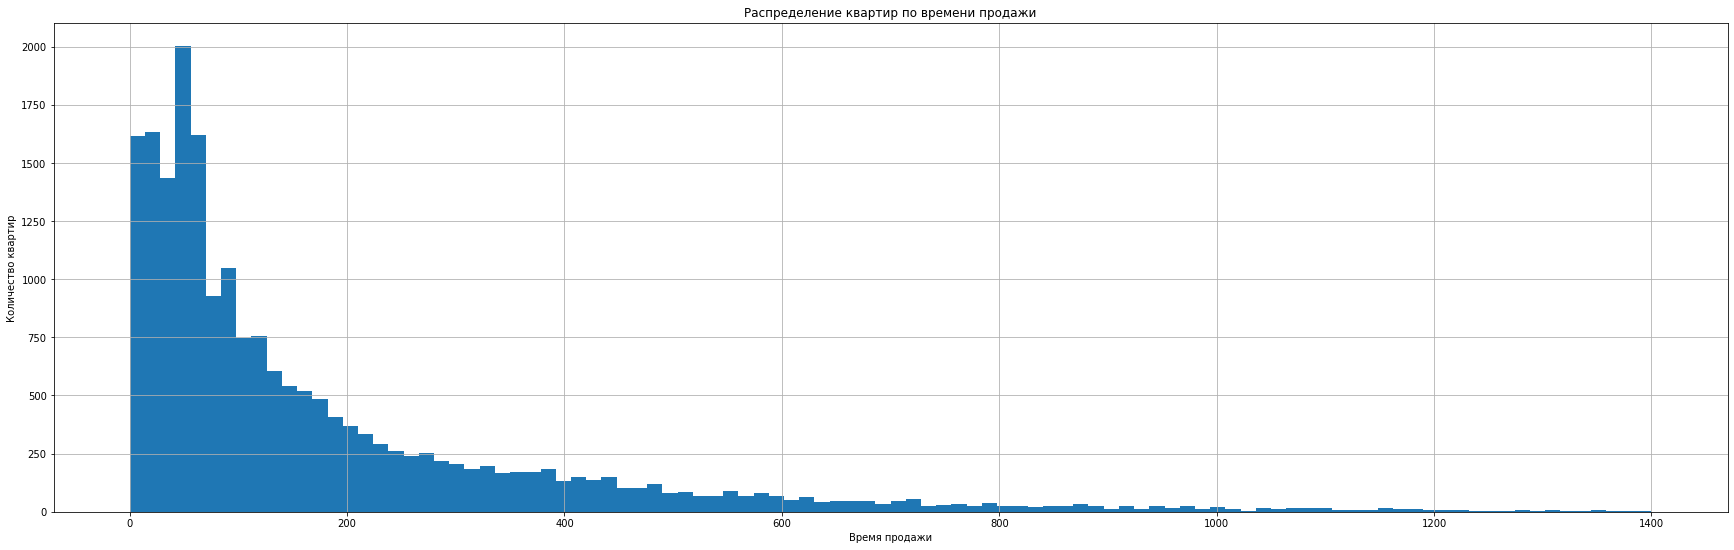

In [39]:
data["days_exposition"].hist(bins = 100, range = (0,1400), figsize = (30,9))
plt.title('Распределение квартир по времени продажи')
plt.xlabel("Время продажи")
plt.ylabel("Количество квартир")
plt.show()

#### Исключаем нули и находим время продажи квартиры в среднем и по медиане

In [40]:
schet = data.query("days_exposition != 0")
print("Дней для продажи по медиане:" , schet["days_exposition"].median())
print("Дней для проддажи в среднем:" , schet["days_exposition"].mean())

Дней для продажи по медиане: 95.0
Дней для проддажи в среднем: 179.70288029247567


- Большинство квартир продается за 100 первых дней. 
- Квартир, которые продаются больше 800 дней, крайне мало, но эти данные сильно влияют на среднее значение дня продажи. 
- Медиана показывает бизкий к реальному результат.

## Изучим факторы влияющие на стоимость квартиры и найдем коэффициент корреляции Пирсона

### Изучим влияние общей площади квартиры

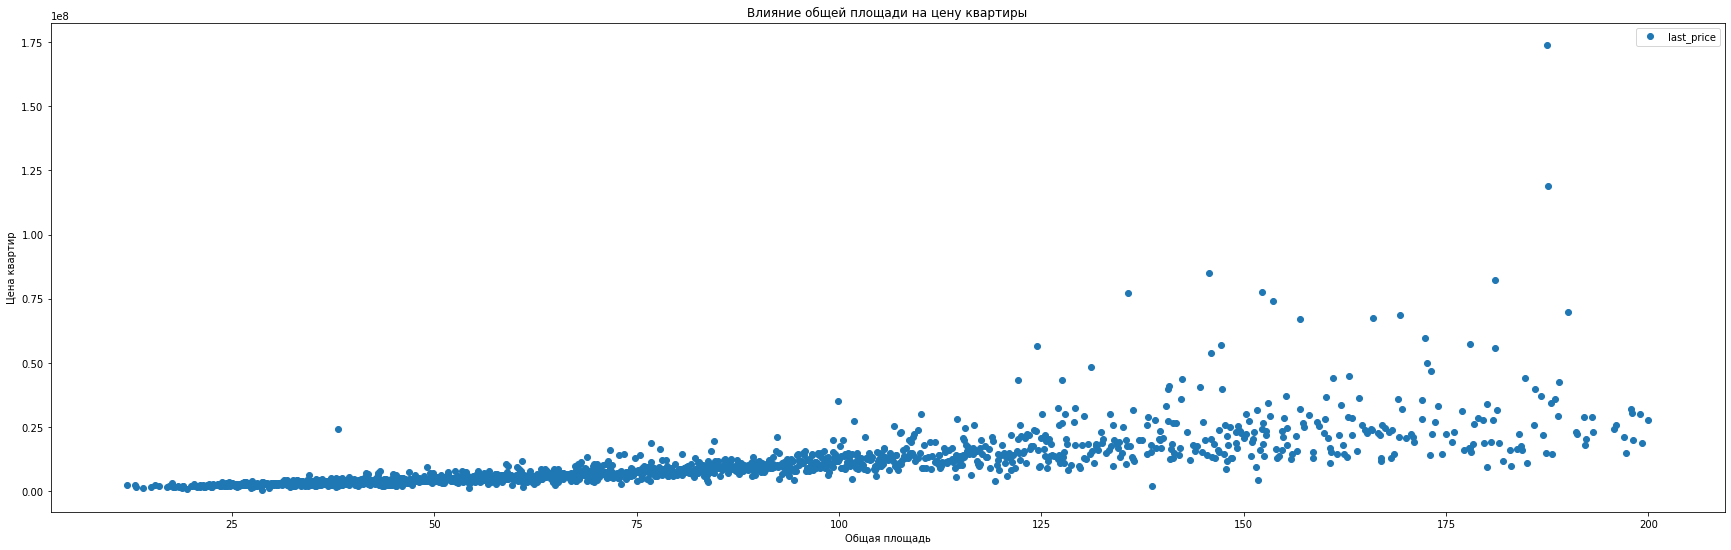

Корреляция: 0.66


In [41]:
data.pivot_table(index = "total_area" , values = "last_price").plot(y="last_price" , style = "o", figsize = (30,9))
plt.title('Влияние общей площади на цену квартиры')
plt.xlabel("Общая площадь")
plt.ylabel("Цена квартир")
plt.show()
print('Корреляция:', round(data['last_price'].corr(data['total_area']), 2))

Площадь определенно влияет на стоимость объекта, на гистограмме видно корреляцию - с увеличением площади растет стоимость. Коэффициент корреляции 0.66 говорит о средней зависимоссти, значит есть и другие факторы.

### Изучим влияние жилой площади квартиры

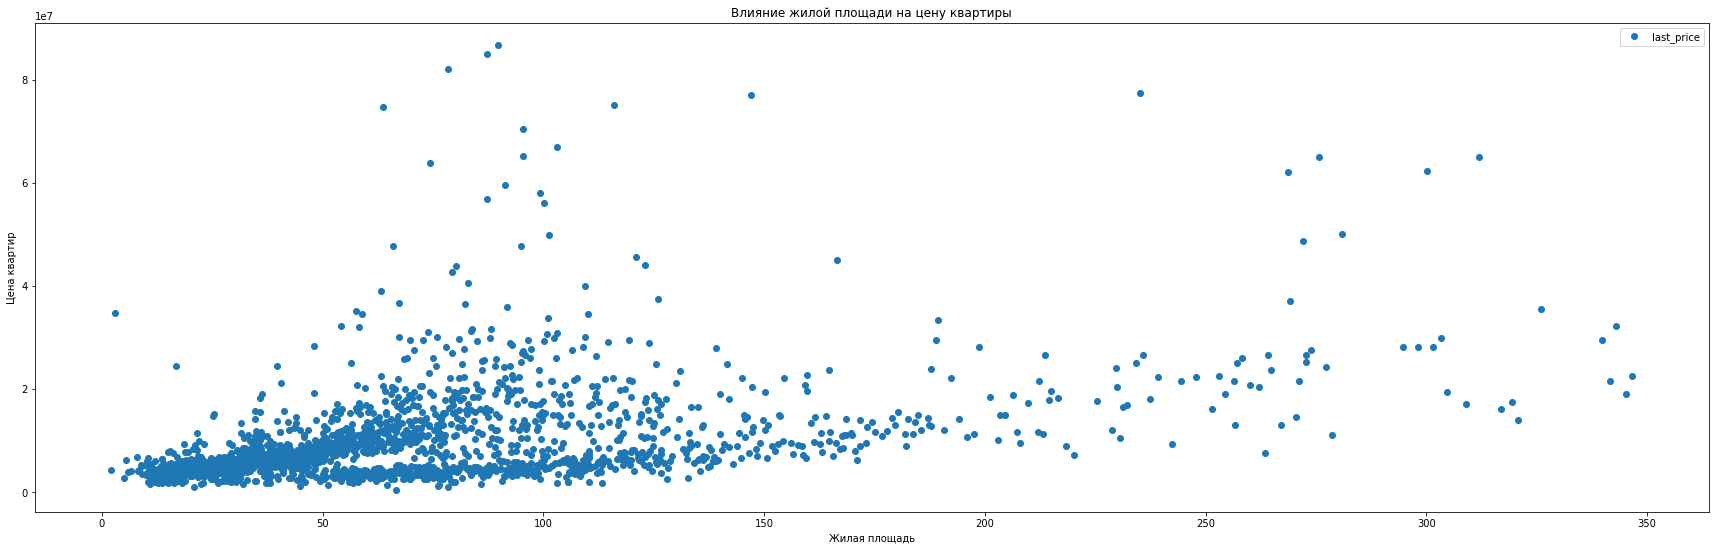

Корреляция: 0.66


In [42]:
data.pivot_table(index = "living_area" , values = "last_price").plot(y="last_price" , style = "o", figsize = (30,9))
plt.title('Влияние жилой площади на цену квартиры')
plt.xlabel("Жилая площадь")
plt.ylabel("Цена квартир")
plt.show()
print('Корреляция:', round(data['last_price'].corr(data['total_area']), 2))

- Коээфициенты корреляции совпадают, значит данные корректны. 
- Видно, что с повышением жилой площажи увеличивается цена. 

### Изучим влияние площади кухни

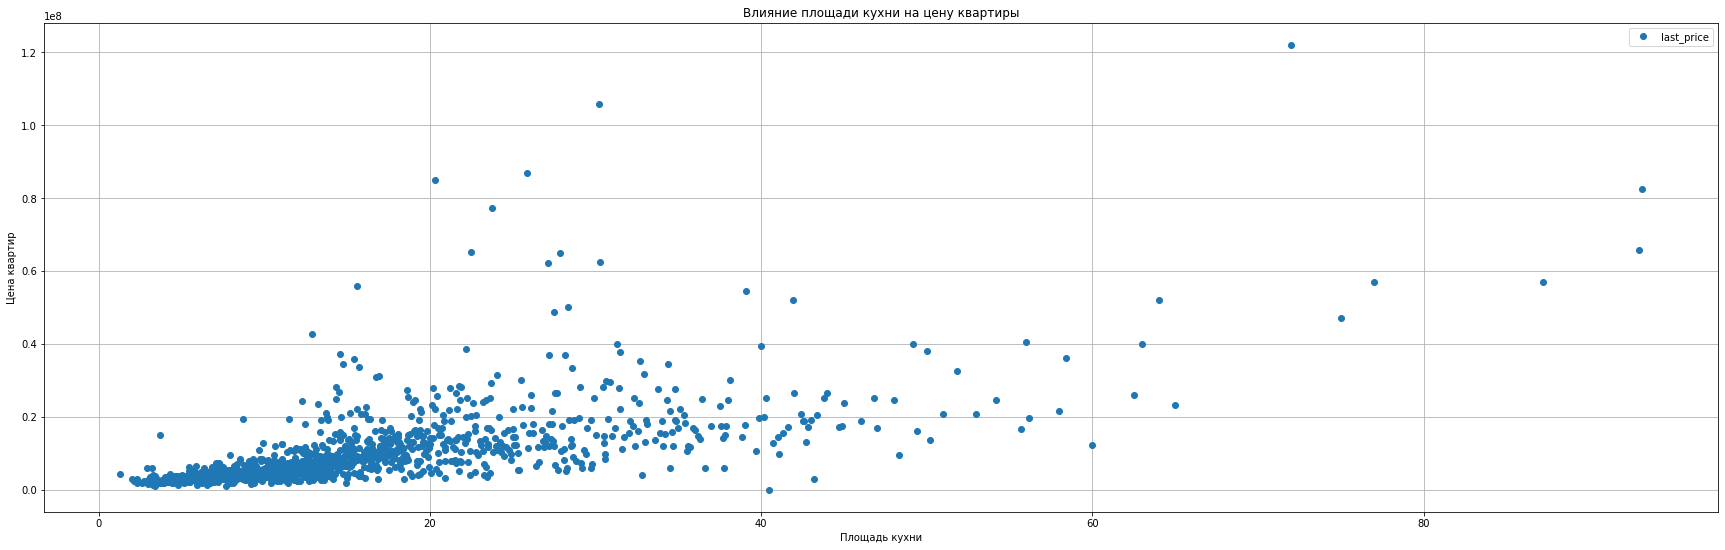

Корреляция: 0.54


In [43]:
data.pivot_table(index = "kitchen_area" , values = "last_price").plot(y="last_price" , style = "o", figsize = (30,9), grid=True)
plt.title('Влияние площади кухни на цену квартиры')
plt.xlabel("Площадь кухни")
plt.ylabel("Цена квартир")
plt.show()
print('Корреляция:', round(data['last_price'].corr(data['kitchen_area']), 2))

- Есть небольшая зависимость - с ростом площади кухни немного рестет и цена объекта. 
- Корреляция средняя. 
- Скорее всего площадь кухни немного влияет на цену. 
- С ростом площади кухни растет и общая площадь квартиры, которая в конечном итоге и влияет на цену.

### Изучим влияние количества комнат в квартире

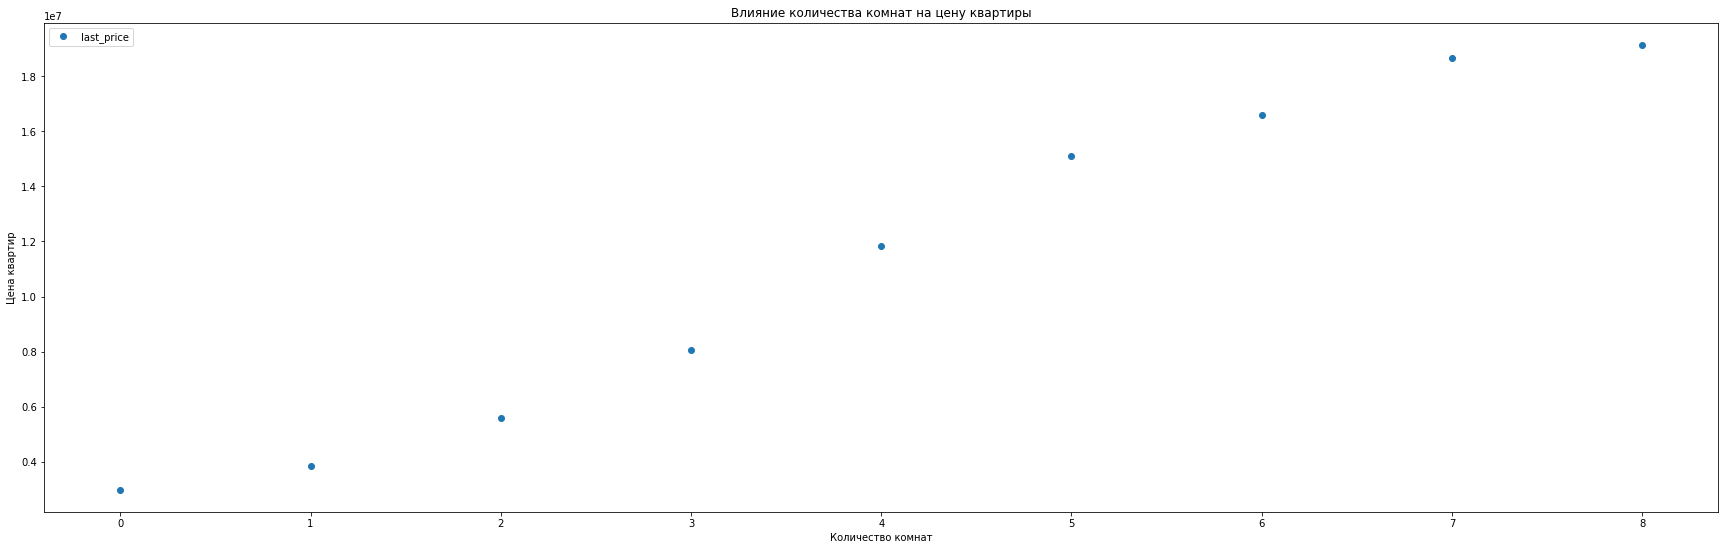

Корреляция: 0.38


In [44]:
data.pivot_table(index = "rooms" , values = "last_price").plot(y="last_price" , style = "o", figsize = (30,9))
plt.title('Влияние количества комнат на цену квартиры')
plt.xlabel("Количество комнат")
plt.ylabel("Цена квартир")
plt.show()
print('Корреляция:', round(data['last_price'].corr(data['rooms']), 2))

- Чем больше комнат - тем больше цена, но коэффициент корреляции очень низкий. 
- Это также затрагивает зависимость цены от общей площади (чем больше комнат, тем больше площадь).

### Изучим влияние типа этажа в квартире

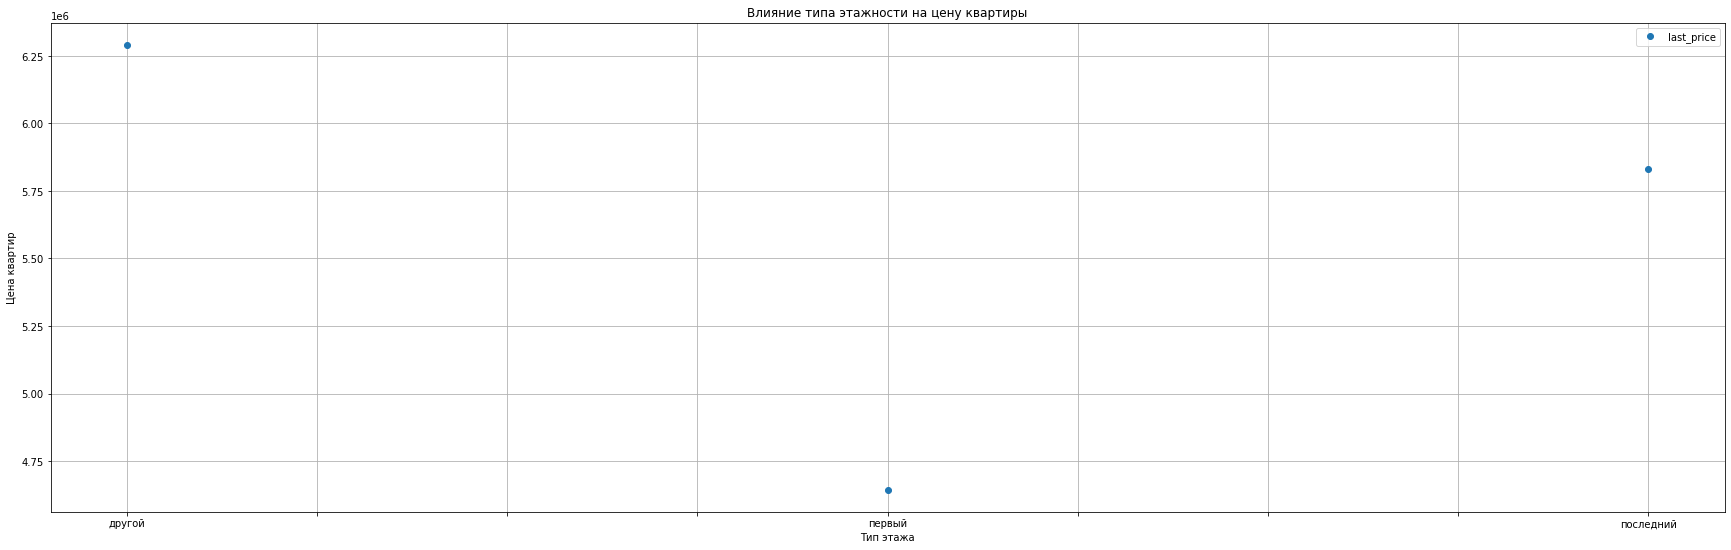

In [45]:
data.pivot_table(index = "floor_category" , values = "last_price").plot(y="last_price" , style = "o", figsize = (30,9), grid=True)
plt.title('Влияние типа этажности на цену квартиры')
plt.xlabel("Тип этажа")
plt.ylabel("Цена квартир")
plt.show()
plt.show()

- В квартирах на последнем и других этажах разница небольшая, на последнем этаже квартиры стоят немного дешевле.

### Изучим влияние даты публикации объявления

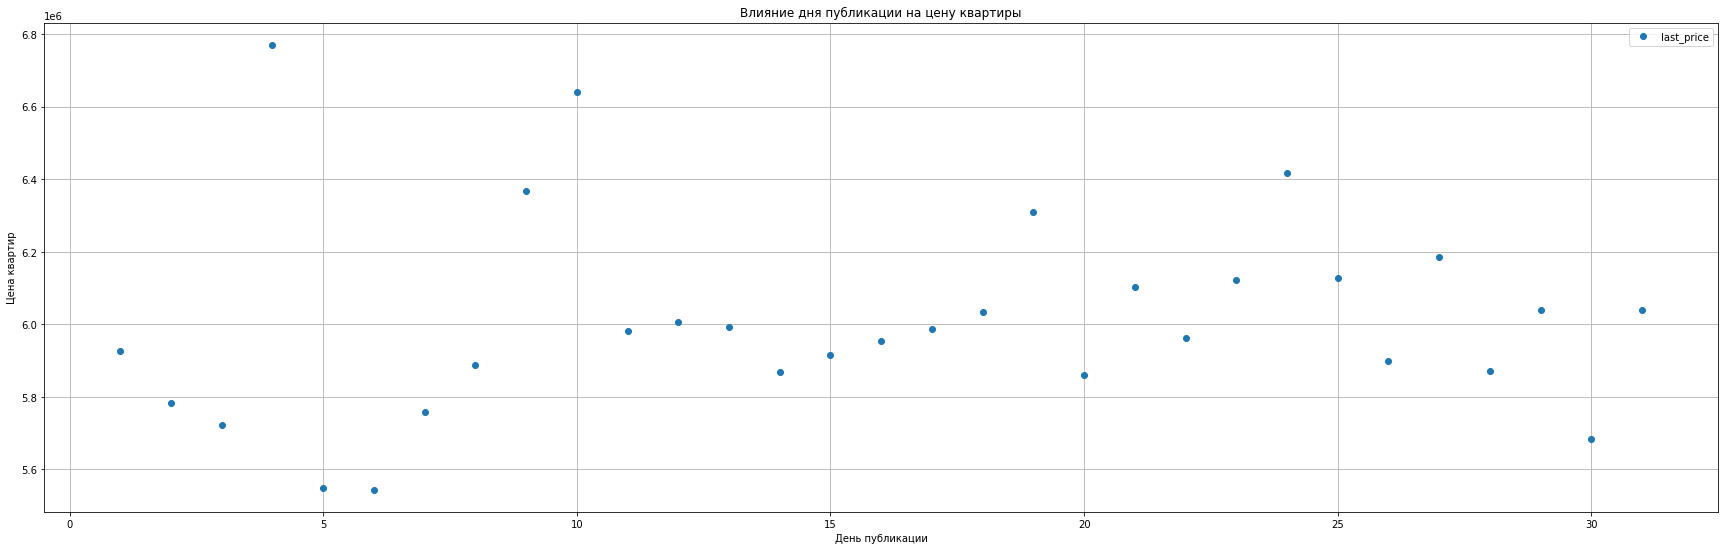

In [46]:
data["day"] = data["first_day_exposition"].dt.day
data.pivot_table(index = "day" , values = "last_price").plot(y="last_price" , style = "o", figsize = (30,9), grid=True)
plt.title('Влияние дня публикации на цену квартиры')
plt.xlabel("День публикации")
plt.ylabel("Цена квартир")
plt.show()

Некоторые значения выделяются -  4, 9, 10, 19 и 24 числа кваритры дороже, а 5, 6 числа дешевле. 

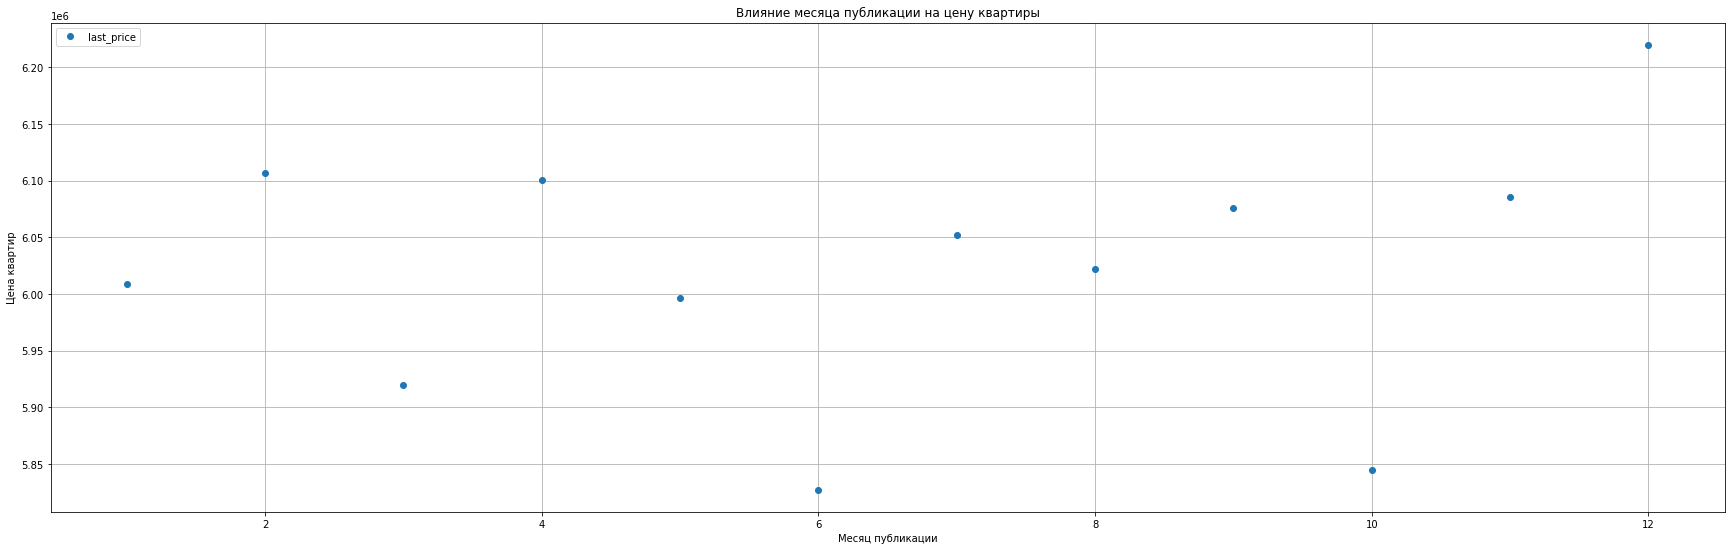

In [47]:
data.pivot_table(index = "month" , values = "last_price").plot(y="last_price" , style = "o", figsize = (30,9), grid=True)
plt.title('Влияние месяца публикации на цену квартиры')
plt.xlabel("Месяц публикации")
plt.ylabel("Цена квартир")
plt.show()

- Выделяется декабрь - объекты стоят дороже. 
- Дешевле всего квартиры продают в июне и октябре. Это может быть связано с сезоном отпусков.

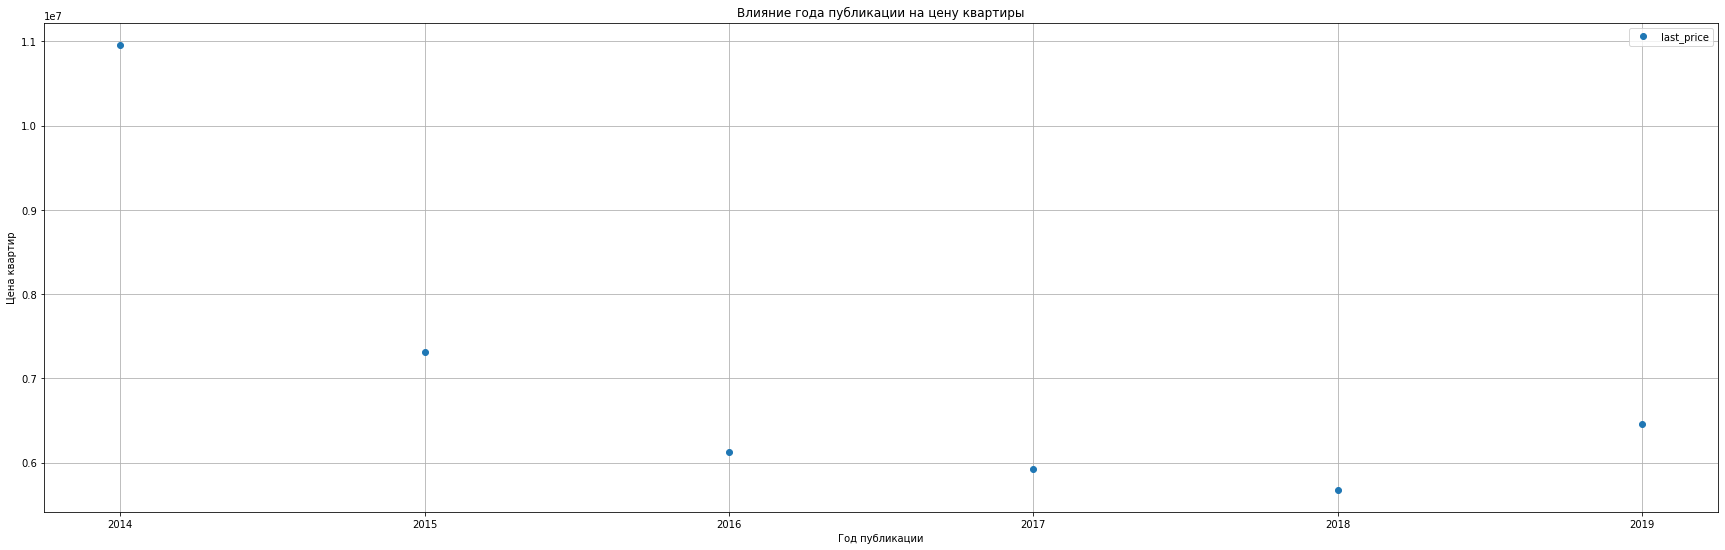

In [48]:
data.pivot_table(index = "year" , values = "last_price").plot(y="last_price" , style = "o", figsize = (30,9), grid=True)
plt.title('Влияние года публикации на цену квартиры')
plt.xlabel("Год публикации")
plt.ylabel("Цена квартир")
plt.show()

- На графике мы видим, как в 2015 году стоимость квартир серьезно упала. 
- В 2019 году есть тенденция на увеличение стоимости объектов.

### Выделим 10 населенных пунктов с самым большим количеством объявлений

In [49]:
top10 = data['locality_name'].value_counts()[0:10].index

#### Посчитаем среднюю стоимость квадратного метра для этих городов

In [50]:
data.query('locality_name in @top10'). pivot_table(index ='locality_name' , values='last_price', aggfunc='mean')

,last_price
locality_name,
Всеволожск,3.789068e+06
Выборг,3.250983e+06
Гатчина,3.488337e+06
Колпино,3.866289e+06
Пушкин,6.153453e+06
Санкт-Петербург,7.317089e+06
деревня Кудрово,4.234158e+06
поселок Мурино,3.654697e+06
поселок Парголово,4.477609e+06


- Города с самой высокой стоимостью квадратного метра - Санкт-Петербург и Пушкин. 
- Дешевле всего во Всеволожске, Выборге, Гатчине и Колпино.

### Рассчитаем cреднюю цену каждого киллометра до центра Санкт-Петербурга

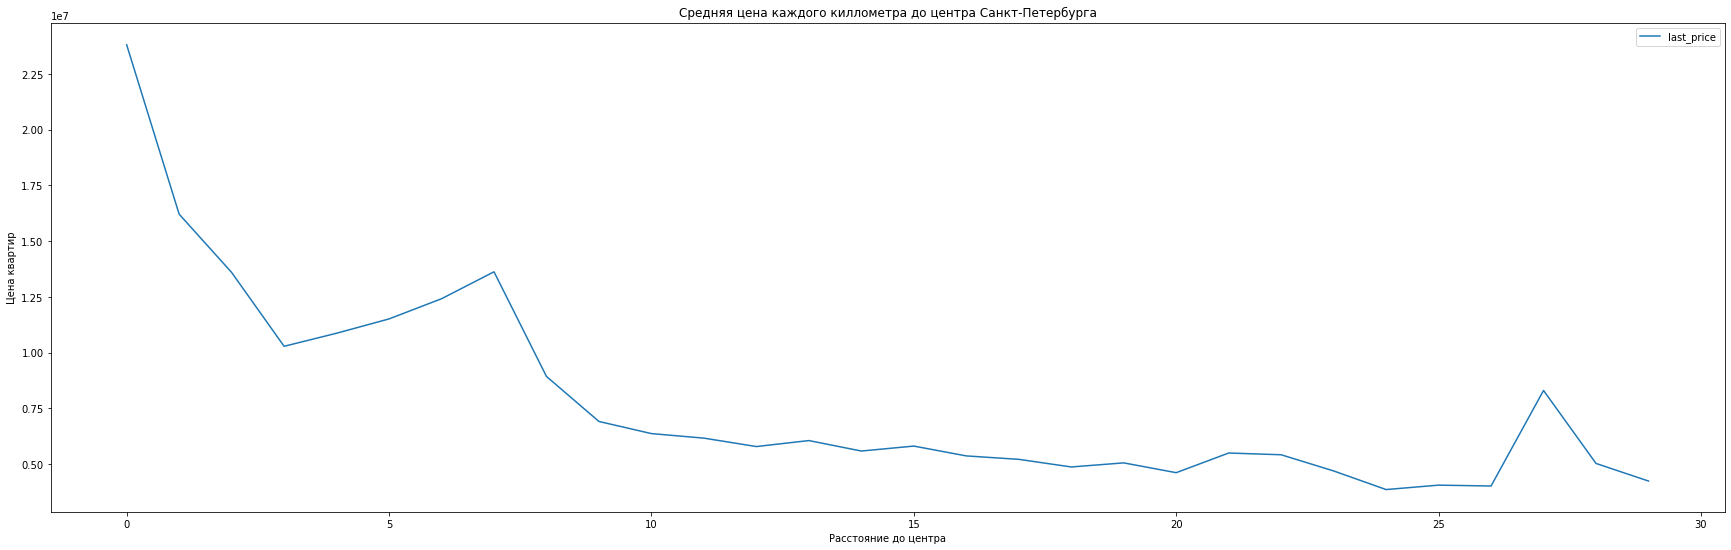

In [51]:
spb = data.query("locality_name == 'Санкт-Петербург'")
spb_pivot = spb.pivot_table(index = "centr", values = "last_price", aggfunc = "mean")
spb_pivot.plot(figsize=(30,9))
plt.title('Средняя цена каждого киллометра до центра Санкт-Петербурга')
plt.xlabel("Расстояние до центра")
plt.ylabel("Цена квартир")
plt.show()

- По графику видно, что есть зависимость цены от киллометра до центра. 
- С удалением от центра уменьшается цена.
- После 7 км заметно, что цена меняется. Это возможный центр города.

## Общий вывод

- Исследование данных о продажах квартир.
- Цель: Найти зависимость цены объекта от остальных парраметров.
- Для начала ознакомился с данными, было выявлено большое количество пропусков. Постоил гистограммы для всех столбцов, чтобы посмотреть на распределение данных.
- Предобратка данных.
-- Заполнил пропуски в столбце высота потолков медианой, данных значения почти всегда типовые.
-- Удалил все строки с пропусками в столбце всего этажей. Данных строк крайне мало, это не повлияет на анализ данных.
-- Пропуски в столбце потолков заменил на 0, пропуск скорее всего означает, что балкона нет.
-- Пропуски в стобце жилой площади были заменены на произведение общей площади к отношению медианы общей площади и медианы жилой площади.
-- Пропуски в столбце площадь кухни были заменены на произведение общей площади к отношению медианы площади кухни и медианы общей площади.
-- Поменял в колличественных столбцах тип данных на int, для простоты работы с ними.
-- Посчитал явные дубликаты в данных, таких не оказалось.
-- Были обнаружены неявные дубликаты в столбце имя локации, поменял все "ё" на "е", убрал приписки "городского типа" и "городской".
-- Работа со значениями высоты потолка, из-за неправльного ввода данных были анамольно быольшие значения. Все значения больше 8, были разделены на 10.
-- Работа с аномалиями столбца количества комнат, убрал все строки, где комнат больше 10.
-- Работа с аномалиями столбца общей площади, убрал все строки, где площадь больше 200 метров.
-- Работа с аномалиями столбца количество этажей в доме, убрал все строки, где этажей больше 30.
- Исследование данных.
-- Посчитал цену 1 квадратного метра и добавил в новый столбец.
-- Выяснил день, месяц и год публикации объявления и добавил в соответствующие столбцы.
-- Определил новый типы этажей квартиры - первый, последний и другой, добавил в новый столбец.
-- Перевел столбец с расстоянием до центра города из метров в киллометры и округлил.
- Исследовантельский анализ данных.
-- Изучил общую площадь на основе гистограммы. Определил, что больше всего квартир с площадью от 30 до 40 метров. Чем больше квартира - тем меньше предложений.
-- Изучил жилую площадь на основе гистограммы. Определил, что большего все квартир с площадью от 15-18 метров, также много квартир с площадью 30 метров. Чем больше площадь, тем меньше предложений.
-- Изучил площадь кухни на основе гистограммы. Определил, что больше всего квартир с площадью от 6 до 11 метров. Есть небольшая зависимость - чем больше кухня, тем дороже квартира.
-- Изучил цену объекта, с помощью группировки по общей площади. Определил, с увеличением площади растет и цена квартиры. 
-- Изучил количетсво комнат на основе гистограммы. Определил, что большая часть объявлений с однокомнатными квартирам. Квартир с более чем 4 комнатами, достаточно мало. 
-- Изучил высоту потолка на основе гистограммы. Определил, что большинство квартир с потолками от 2.5 до 3.2 метров. Квартир с потолками выше достаточно мало.
-- Изучил этаж квартиры на основе гистограммы. Определил, что в основном квартиры располагаются на этажах от 1 до 5. Это связано с достаточно массивной застройкой городов пятиэтажными домами. Квартир с этажом больше 25 достаточно мало.
-- Изучил тип этажности на основе гистограммы. Определил, что основное количетсво квартир в категории "другие" (не первый и не последний этаж). 
-- Изучил общее количетсво этажей в доме на основе гистограммы. Определил, что большинство домов пятиэтажные. Также достаточно много девятиэтажных домов.
-- Изучил расстояние до центра города на основе гистограммы. Определил, что большинство домов распологаются в 10-15 киллометрах от центра города. Также достаточно много квартир с расстоянием до 10 киллометров.
-- Изучил расстояние до аэропорта на основе гистграммы. Определил, что большинство домов располагаются в 10 - 40 киллометрах до близжайшего аэропорта. Расстояние больше 60 киллометров считается крайне редким.
-- Изучил расстояние до близжайшего парка на основе гистограммы. определил, что у большинства квартир расстояние до близжайшего парка около 500 метров.
-- Изучил день и месяц публикации объявления на основе гистограммы. Определил, что пик публикаций приходится на 1 и 10 число, преобладающими месяцами считаются февраль, март, апрель и ноябрь. Меньше всего объявлений в мае. 
-- Изучил время продажи квартиры на основе гистограммы. Определил, что большинство квартир продается за 95 дней.
- Изучил факторы влияющие на цену квартиры.
-- ИЗучил влияние общей площади. Определил, что площадь влияет на цену, чем больше площадь, тем дороже квартира. 
-- Изучил влияние жилой площади. Определил, что жилая площадь также влияет на цену, чем больше площадь, тем больше цена.
-- Изучил влияние площади кухни. Определил, что зависимость средняя, в общей картине, чем больше кухня, тем дороже квартира.
-- Изучил колличество комнат. Определил, что есть зависимость количетсва комнат от цены, чем больше комнат, тем дороже квартира.
-- Изучил тип этажа. Определил, что квартиры на первом этаже дешевле остальных. самыми дорогими оказались квартиры между первым и последним этажом.
-- Изучил даты объявлений. Определил, что по дням корреляция практически отсутствует. Можно выделить 4, 9, 10, 19 и 24 день, здесь квартиры продают дороже. 5 и 6 числа квартиры продают дешевле. Из месяцов выделяется декабрь, в декабре квартиры дороже. В июне и октябре квартиры выставляются дешевле. В 2016 году квартиры сильно подешевели, однако есть тенденция на рост цен на жилье. 
- Выделил 10 город с самым большим количеством объявлений.
-- Посчитал среднюю цену квадратного метра для каждого города. Самами дорогоими оказались Санкт-Петербург и Пушкин. Самый дешевый метр в Всеволожске, Выборге, Гатчине и Колпино.
-- Рассмотрел среднюю цену каждого киллометра до центра города Санкт-Петербурга. Определил, что есть зависимость, с каждым киллометром дальше центра - цена ниже.
- Сделаю итоговый вывод на основе данной таблицы.
-- Самыми серьезными факторами влияющими на цену квартиры, являются общая площадь и расстояние до центра города. Также факторов, влияющим на цену, является площадь кухни. Тяжелее всего будет продать квартиру на первом этаже. Продать квартиру тяжелее всего в мае и июне, из-за летних отпусков. Лучше выставлять квартиру на продажу в ноябре, феврале, апреле или марте. В среденем квартира должна продаваться за 100 первых дней. Также определили, что квартира является хорошей инвестицей, так как наблюдается рост стоимости. Самыми дорогими городами оказались Санкт-Петербург и Пушкин. На данный момент дешевле всего квадратный метр стоит во Всеволожске, Выборге, Гатчине и Колпино.

